# CIV1504: BikeShare Toronto
## Part 1: Data Cleaning & EDA
---
**Author:** Nicole Chan<br> 
**Start Date:** Nov 8th, 2023<br>
**End Date:** Dec 9th, 2023<br>
**Adopted from:** Jupyter Notebook titled "bikeshare-toronto-data-cleaning-eda" from Jason Ho in  [Kaggle Open Source](https://www.kaggle.com/code/jasonzxho/bikeshare-toronto-data-cleaning-eda)

## Introduction

This Jupyter Notebook is Part 1 of my CIV1504 Project. I used the BikeShare Toronto data and hourly weather data between 2018-01-01 to 2020-12-31.


**Purpose**<br>
This notebook aims to merge BikeShare Toronto and hourly weather data into a single dataframe. Then, it will perform EDA and generate visualizations to gain insights into bikeshare usage patterns. The cleaned dataset will be exported for further analysis in Part 2.


**Data Sources**<br>
1. [City of Toronto: Bikeshare](https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/)

2. [Government of Canada: Weather](https://climate.weather.gc.ca/historical_data/search_historic_data_e.html)

The notebook also inputted calendar information such as weekends and holidays to further explore the effect of timing on rider usage

In [99]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Timer
from tqdm import tqdm 
import time

# global settings
pd.set_option('display.max_columns', None) #Set max columns view to unlimited

## Table of Contents
[Section 1: Loading and Inspecting the Data](#Section-1:-Loading-and-Inspecting-the-Data)<br>
- [Part 1: Trips Datasets](#Part-1:-Trips-Datasets)

- [Part 2: Weather Datasets](#Part-2:-Weather-Datasets)

[Section 2: Data Wrangling](#Section-2:-Data-Wrangling)<br>
- [Part 1: Trip Datasets](#Part-1:-Trip-Datasets)

- [Part 2: Weather Datasets](#Part-2:-Weather-Datasets)

[Section 3: Exploratory Data Analysis](#Section-3:-Exploratory-Data-Analysis)<br>

[Section 4: Conclusions](#Section-4:-Conclusions)<br>

---
## Step 1: Loading and Inspecting the Data

### Part 1: Trip Data
#### **2018 Trip Data**
**_About the Data_**

The 2018 trip dataset contains 1,922,955 bike trip data. It contains 9 features. The description of each feature is listed below:

- `trip_id`: Unique ID code for individual trip taken.
- `trip_start_time`: Trip start time.
- `trip_end_time`: Trip end time.
- `trip_duration_seconds`: Duration of the trip in seconds.
- `from_station_id`: Unique ID code for the start station.
- `from_station_name`: Name of start station.
- `to_station_id`: Unique ID code for the end station.
- `to_station_name`: Name of end station.
- `user_type`: Type of user, either Member or Casual.

In [100]:
# Load in 2018 datasets
Q1_18 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2018\\2018-Q1.csv')
Q2_18 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2018\\2018-Q2.csv')
Q3_18 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2018\\2018-Q3.csv')
Q4_18 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2018\\2018-Q4.csv')

#### **2019 & 2020 Trip Data**
**_About the Data_**

The 2019 trip dataset contains 2,439,517 bike trip data taken between more than 600 stations across the City of Toronto. The 2020 trip dataset contains 2,612,704 bike trip data. Starting 2019, the data feature names changed and 2 additional features were added making it 11 total. The description of each feature is listed below:

- `Trip Id`: Unique ID code for individual trip taken.
- `Subscription Id`: Unique ID code for the individual member, this can be used to track Annual Member usage.
- `Trip  Duration`: Duration of the trip in seconds.
- `Start Station Id`: Unique ID code for the start station.
- `Start Time`: Trip start time.
- `Start Station Name`: Name of start station.
- `End Station Id`: Unique ID code for the end station.
- `End Time`: Trip end time.
- `End Station Name`: Name of end station.
- `Bike Id`: Unique ID for the individual bike used.
- `User Type`: Type of user, either Annual or Casual.

In [101]:
# Load in 2019 & 2020 datasets
Q1_19 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2019\\2019-Q1.csv')
Q2_19 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2019\\2019-Q2.csv')
Q3_19 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2019\\2019-Q3.csv')
Q4_19 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2019\\2019-Q4.csv')

M1_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-01.csv')
M2_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-02.csv')
M3_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-03.csv')
M4_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-04.csv')
M5_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-05.csv')
M6_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-06.csv')
M7_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-07.csv')
M8_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-08.csv')
M9_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-09.csv')
M10_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-10.csv')
M11_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-11.csv')
M12_20 = pd.read_csv('C:\\Users\\12630\\Downloads\\Toronto_Ridership_2018_2020\\Bikeshare 2020\\2020-12.csv')

#### **2018-2020 Weather Data**
**_About the Data_**

The dataset is taken during the each year between 2018-2020 recorded from Toronto City Center, a weather station located on the Toronto Island. The csv contains 28 features. The description of each feature is listed below:

- `Longitude (x)`: The longitude geo-coordinate of the weather station
- `Latitude (y)`: The longitude geo-coordinate of the weather station
- `Station Name`: The name of the weather station
- `Climate ID`: The Climate ID is a 7 digit number assigned by the Meteorological Service of Canada to a site where official weather observations are taken, and serves as a permanent, unique identifier.
- `Date/Time`: The date and time of when the weather data was collected.
- `Year`: The year the data was collected.
- `Month`: The month the data was collected.
- `Day`: The day the data was collected.
- `Time`: The time of day the data was collected.
- `Temp (°C)`: The temperature of the air in degrees Celsius (°C). 
- `Temp Flag`: Flag for unique events for temperature.
- `Dew Point Temp (°C)`: The dew point temperature in degrees Celsius (°C), a measure of the humidity of the air, is the temperature to which the air would have to be cooled to reach saturation with respect to liquid water. Saturation occurs when the air is holding the maximum water vapour possible at that temperature and atmospheric pressure.
- `Dew Point Temp Flag`: Flag for unique events for dew point temp.
- `Rel Hum (%)`: Relative humidity in percent (%) is the ratio of the quantity of water vapour the air contains compared to the maximum amount it can hold at that particular temperature.
- `Rel Hum Flag`: Flag for unique events for relative humidity.
- `Wind Dir (10s deg)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Dir Flag`: Flag for unique events for wind direction.
- `Wind Spd (km/h)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Spd Flag`: Flag for unique events for wind speed.
- `Visibility (km)`: Visibility in kilometres (km) is the distance at which objects of suitable size can be seen and identified.
- `Visibility Flag`: Flag for unique events for visibility.
- `Stn Press (kPa)`: The atmospheric pressure in kilopascals (kPa) at the station elevation. Atmospheric pressure is the force per unit area exerted by the atmosphere as a consequence of the mass of air in a vertical column from the elevation of the observing station to the top of the atmosphere.
- `Stn Press Flag`: Flag for unique events for station atmospheric pressure.
- `Hmdx`: Humidex is an index to indicate how hot or humid the weather feels to the average person. It is derived by combining temperature and humidity values into one number to reflect the perceived temperature.
- `Hmdx Flag`: Flag for unique events for humidex.
- `Wind Chill`: Wind chill is an index to indicate how cold the weather feels to the average person. It is derived by combining temperature and wind velocity values into one number to reflect the perceived temperature.
- `Wind Chill Flag`: Flag for unique events for wind chill index.
- `Weather`: Observations of atmospheric phenomenon including the occurrence of weather and obstructions to vision have been taken at many hourly reporting stations.

In [102]:
weather_df = []

for year in range(2018, 2021):
    for month in range(1, 13):
        month_str = f'0{month}' if month < 10 else str(month)
        file_str = f'C:\\Users\\12630\\Downloads\\toronto-city-centre-hourly-weather-data-20172020\\Weather {year}\\en_climate_hourly_ON_6158359_{month_str}-{year}_P1H.csv'
        df = pd.read_csv(file_str)
        weather_df.append(df)

# Concatenate all DataFrames into a single DataFrame
weather_df = pd.concat(weather_df, ignore_index=True)

# Display the merged DataFrame
weather_df


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 00:00,2018,1,1,00:00,-16.2,NaN,-20.5,NaN,70.0,NaN,31.0,NaN,8.0,NaN,16.1,NaN,102.13,NaN,NaN,NaN,-22.0,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 01:00,2018,1,1,01:00,-16.8,NaN,-21.1,NaN,70.0,NaN,NaN,M,4.0,NaN,16.1,NaN,102.10,NaN,NaN,NaN,-20.0,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 02:00,2018,1,1,02:00,-17.3,NaN,-20.8,NaN,75.0,NaN,29.0,NaN,15.0,NaN,16.1,NaN,102.15,NaN,NaN,NaN,-26.0,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 03:00,2018,1,1,03:00,-17.9,NaN,-21.6,NaN,73.0,NaN,31.0,NaN,9.0,NaN,16.1,NaN,102.13,NaN,NaN,NaN,-24.0,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 04:00,2018,1,1,04:00,-17.2,NaN,-21.1,NaN,72.0,NaN,31.0,NaN,5.0,NaN,16.1,NaN,102.09,NaN,NaN,NaN,-21.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-12-31 19:00,2020,12,31,19:00,0.1,NaN,-3.3,NaN,78.0,NaN,27.0,NaN,13.0,NaN,16.1,NaN,101.86,NaN,NaN,NaN,NaN,NaN,NaN
26300,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-12-31 20:00,2020,12,31,20:00,0.0,NaN,-4.0,NaN,74.0,NaN,30.0,NaN,11.0,NaN,16.1,NaN,101.96,NaN,NaN,NaN,-4.0,NaN,NaN
26301,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-12-31 21:00,2020,12,31,21:00,0.4,NaN,-4.5,NaN,70.0,NaN,26.0,NaN,8.0,NaN,16.1,NaN,102.02,NaN,NaN,NaN,NaN,NaN,NaN
26302,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-12-31 22:00,2020,12,31,22:00,-0.1,NaN,-4.9,NaN,70.0,NaN,30.0,NaN,11.0,NaN,16.1,NaN,102.13,NaN,NaN,NaN,-4.0,NaN,NaN


## Section 2: Data Wrangling

Back to [Table of Contents](#Table-of-Contents).<br>

Start by combining the datasets by year, then inspecting the dataframes and perform any data cleaning if required.

1. Trip Datasets
2. Weather Datasets

### **Part 1: Trip Datasets**

In [103]:
# Combine csvs into yearly dataframes
trips18 = pd.concat([Q1_18,Q2_18,Q3_18,Q4_18]).reset_index(drop=True)
trips19 = pd.concat([Q1_19,Q2_19,Q3_19,Q4_19]).reset_index(drop=True)
trips20 = pd.concat([M1_20, M2_20, M3_20, M4_20, M5_20, M6_20, M7_20, M8_20, M9_20, M10_20, M11_20, M12_20]).reset_index(drop=True)

# Display dataframe shape
print(f"""
2018 Trip dataframe shape: {trips18.shape}
2019 Trip dataframe shape: {trips19.shape}
2020 Trip dataframe shape: {trips20.shape}
""")


2018 Trip dataframe shape: (1922955, 9)
2019 Trip dataframe shape: (2439517, 11)
2020 Trip dataframe shape: (2911308, 11)



**_Observations_**
- In 2018 there are over 1.9 million recorded trips with 9 column features.
- In 2019 there are over 2.4 million recorded trips with 11 column features, 500k more trips than 2018.
- In 2020 there are over 2.9 million recorded trips with 11 column features, 500k more trips than 2019.

**_Next Step_**<br>
Because there are 2 additonal column features in 2019-2020 trip datasets, we need to take a closer look into the datasets into what the differences are. 

In [104]:
# Display first 3 rows of each dataframe
print("\n**trips18 dataset**")
display(trips18.head(3))
print("\n**trips19 dataset**")
display(trips19.head(3))
print("\n**trips20 dataset**")
display(trips20.head(3))


**trips18 dataset**


,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member



**trips19 dataset**


,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member



**trips20 dataset**


,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,7334128,324700,648,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271.0,01/01/2020 00:19,Yonge St / Alexander St - SMART,3104.0,Annual Member
1,7334129,350579,419,7007,01/01/2020 00:10,College St / Huron St,7163.0,01/01/2020 00:17,Yonge St / Wood St,2126.0,Annual Member
2,7334130,438337,566,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108.0,01/01/2020 00:22,Front St E / Cherry St,4425.0,Annual Member


**_Observations_**

- It appears that in 2019-2020, *BikeShare Toronto* added in 2 column features `Subscription Id` & `Bike Id` allowing for more granularity in analyzing their trip data. 


**_Next Steps_**
1. Inspect each datasets' datatype
2. Check for any duplicates & `null` values in the datasets

In [105]:
# Check each dataframe's datatypes
print(f"""
**trips18 dataset**\n
{trips18.dtypes}\n
========================================\n
**trips19 dataset**\n
{trips19.dtypes}\n
========================================\n
**trips20 dataset**\n
{trips20.dtypes}
""")


**trips18 dataset**

trip_id                   int64
trip_duration_seconds     int64
from_station_id           int64
trip_start_time          object
from_station_name        object
trip_stop_time           object
to_station_id             int64
to_station_name          object
user_type                object
dtype: object


**trips19 dataset**

Trip Id                 int64
Subscription Id         int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id                 int64
User Type              object
dtype: object


**trips20 dataset**

Trip Id                 int64
Subscription Id         int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id         

**_Observations_**
- `trip_start_time` & `trip_stop_time` data type needs to be changed to `datetime64`
- `from_station_id` & `to_station_id` data type needs to be changed to `int64`
- `trip_duration_seconds` can be simplified down to `trip_duration_minutes`

**_Next Steps_**<br>
Check for any duplicates & null values in the datasets

In [106]:
# Check for duplicates
print(f"""
Duplicates found in trips18: {trips18.duplicated().sum()}
Duplicates found in trips19: {trips19.duplicated().sum()}
Duplicates found in trips20: {trips20.duplicated().sum()}
""")


Duplicates found in trips18: 0
Duplicates found in trips19: 0
Duplicates found in trips20: 0



In [107]:
# Check for null values
print(f"""
**trips18 dataset**\n
Total Number of Null values:\n\n{trips18.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips18.isna().mean()*100}\n
========================================\n
**trips19 dataset**\n
Total Number of Null values:\n\n{trips19.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips19.isna().mean()*100}\n
========================================\n
**trips20 dataset**\n
Total Number of Null values:\n\n{trips20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips20.isna().mean()*100}
""")


**trips18 dataset**

Total Number of Null values:

trip_id                  0
trip_duration_seconds    0
from_station_id          0
trip_start_time          0
from_station_name        0
trip_stop_time           0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

----------------------------------------

Total Percentage of Null values:

trip_id                  0.0
trip_duration_seconds    0.0
from_station_id          0.0
trip_start_time          0.0
from_station_name        0.0
trip_stop_time           0.0
to_station_id            0.0
to_station_name          0.0
user_type                0.0
dtype: float64


**trips19 dataset**

Total Number of Null values:

Trip Id                 0
Subscription Id         0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        454
End Time                0
End Station Name      454
Bike Id                 0
User Type               0


**_Observations_**

_2018 Trip Dataset_

There are no duplicates or any null values found! 

_2019 Trip Dataset_

There are 454 (0.018%) `End Station Id` and `End Station Name` missing. Lets take a closer look into these null values to see if we can impute the missing information, if not then we can drop these datapoints since it is less than 0.1% of total datapoints.

_2020 Trip Dataset_

There are 691 (0.036%) `End Station Id` and `End Station Name` missing similar to the 2019 Trips Dataset. Therefore I need to take a closer look into these null values as well, if we cannot impute the missing data we will need to drop these datapoints since it is less than 0.1% of total datapoints. `Start Station Name` can be imputed easily as there are no missing `Start Station Id`. `Bike Id` will need to be dropped as there is no way to impute that data.

**_Next Steps_**
1. Investigate missing `End Station Id` & `End Station Name` values in 2019 & 2020 datasets, then impute/drop missing values
2. Change/Fix datatypes & column names
3. Rename columns/features for consistency
4. Add new features for weekend and holiday classifiers
5. Concatenate dataframes

#### *Issue 1: Investigate & Impute/Drop Missing Values in 2019 & 2020*

In [108]:
# Display rows with null values
print("\n**trips19 dataset**")
display(trips19[trips19.isna().any(axis=1)].head(3))
print("\n**trips20 dataset**")
display(trips20[trips20.isna().any(axis=1)].head(3))


**trips19 dataset**


,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
693086,5370500,345839,696,7228,06/17/2019 13:21,Queen St W / Roncesvalles Ave,NaN,06/17/2019 13:32,NaN,2345,Annual Member
969363,5679465,391015,0,7077,07/11/2019 16:45,College Park South,NaN,07/11/2019 16:45,NaN,1232,Casual Member
1289598,6033723,427794,327,7444,08/06/2019 01:41,Clendenan Ave / Rowland St - SMART,NaN,08/06/2019 01:46,NaN,1890,Casual Member



**trips20 dataset**


,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
9718,7345835,401614,741,7204,01/04/2020 08:50,College St / Crawford St,NaN,01/04/2020 09:02,NaN,825.0,Annual Member
9760,7345883,343414,1071,7109,01/04/2020 09:24,Seaton St / Dundas St E - SMART,NaN,01/04/2020 09:42,NaN,2570.0,Annual Member
9884,7346023,410628,1261,7199,01/04/2020 10:25,College St / Markham St,NaN,01/04/2020 10:46,NaN,3856.0,Annual Member


**_Observations_**

Unfortunately it appears that there are a number of trips where none of the End Station information was recorded. Luckily it only comprises of less than 0.1% of total data each year so either way it will not have a statistical significance. Drop the null values. 


In [109]:
# Drop row if both `End Station Id` & `End Station Name` are missing
trips19.dropna(subset=['End Station Id', 'End Station Name'], thresh=1, inplace=True)
trips20.dropna(subset=['End Station Id', 'End Station Name','Start Station Name'], how='any', inplace=True)
trips20 = trips20[trips20['Bike Id'].notna()]
trips19.reset_index(inplace=True, drop=True)
trips20.reset_index(inplace=True, drop=True)

In [110]:
# Recheck for null values
print(f"""
**trips19 dataset**\n
Total Number of Null values:\n\n{trips19.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips19.isna().mean()*100}\n
========================================\n
**trips20 dataset**\n
Total Number of Null values:\n\n{trips20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{trips20.isna().mean()*100}
""")


**trips19 dataset**

Total Number of Null values:

Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64

----------------------------------------

Total Percentage of Null values:

Trip Id               0.0
Subscription Id       0.0
Trip  Duration        0.0
Start Station Id      0.0
Start Time            0.0
Start Station Name    0.0
End Station Id        0.0
End Time              0.0
End Station Name      0.0
Bike Id               0.0
User Type             0.0
dtype: float64


**trips20 dataset**

Total Number of Null values:

Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0


#### *Issue 2: Change Datatypes*

**_Next Steps_**
- `trip_start_time`/`Start Time` & `trip_stop_time`/`End Time` datatype needs to be changed to datetime64
- `from_station_id`/`Start Station Id` & `to_station_id`/`End Station Id` datatype needs to be changed to int64
- **OPTIONAL**: `trip_duration_seconds`/`Trip  Duration` can be simplified down to `trip_duration_minutes`/`Trip Duration Minutes`
- `user_type`/`User Type` to be changed to boolean classifier

In [111]:
%%time
# Changing `trip_start_time`/`Start Time` & `trip_stop_time`/`End Time` dtype from object to datetime
trips18['trip_start_time'] = pd.to_datetime(trips18['trip_start_time'])
trips19['Start Time'] = pd.to_datetime(trips19['Start Time'])
trips20['Start Time'] = pd.to_datetime(trips20['Start Time'])

trips18['trip_stop_time'] = pd.to_datetime(trips18['trip_stop_time'])
trips19['End Time'] = pd.to_datetime(trips19['End Time'])
trips20['End Time'] = pd.to_datetime(trips20['End Time'])


CPU times: total: 18.7 s
Wall time: 35.1 s


In [112]:
# Change `from_station_id` & 'to_station_id' dtype to int
trips18['from_station_id'] = trips18['from_station_id'].astype(int)
trips18['to_station_id'] = trips18['to_station_id'].astype(int)
trips19['End Station Id'] = trips19['End Station Id'].astype(int)
trips20['End Station Id'] = trips20['End Station Id'].astype(int)

Next datatype issue to resolve is the trip duration metric. We have two options available to us:
1. We can round the duration time into minutes or;
2. We can leave the duration time in seconds and have the option to change it later.

Currently I have the option to keep the duration time in seconds active but left the code to drop it commented out.

In [113]:
# Verify if we can make column into boolean variable
print(f"""
User Types found in trips18: {trips18['user_type'].unique()}
User Types found in trips19: {trips19['User Type'].unique()}
User Types found in trips20: {trips20['User Type'].unique()}
""")


User Types found in trips18: ['Annual Member' 'Casual Member']
User Types found in trips19: ['Annual Member' 'Casual Member']
User Types found in trips20: ['Annual Member' 'Casual Member']



In [114]:
# Dictionary for converting membership status to binary
member = {'Member': 1, 'Casual': 0}
member2 = {'Annual Member': 1, 'Casual Member': 0}

# Create new column for `is_member` (1= Members, 0 = Casual)
trips18['Member'] = trips18['user_type'].map(member2)
trips19['Member'] = trips19['User Type'].map(member2)
trips20['Member'] = trips20['User Type'].map(member2)

# Dropping `user_type`
trips18.drop(['user_type'], axis=1, inplace=True)
trips19.drop(['User Type'], axis=1, inplace=True)
trips20.drop(['User Type'], axis=1, inplace=True)

#### *Issue 5: Add New Weekend & Holiday Features*

In [115]:
# Create new `Weekend` Boolean Column
trips18['Weekend'] = ((trips18['trip_start_time'].dt.dayofweek) > 5).astype(int)
trips19['Weekend'] = ((trips19['Start Time'].dt.dayofweek) > 5).astype(int)
trips20['Weekend'] = ((trips20['Start Time'].dt.dayofweek) > 5).astype(int)

In [116]:
# Weekend Value Counts
print(f"""
trips18['Weekend'] value counts \n
{trips18['Weekend'].value_counts()}\n
========================================\n
trips19['Weekend'] value counts \n
{trips19['Weekend'].value_counts()}\n
========================================\n
trips20['Weekend'] value counts \n
{trips20['Weekend'].value_counts()}
""")


trips18['Weekend'] value counts 

Weekend
0    1700750
1     222205
Name: count, dtype: int64


trips19['Weekend'] value counts 

Weekend
0    2141325
1     297738
Name: count, dtype: int64


trips20['Weekend'] value counts 

Weekend
0    2450074
1     458342
Name: count, dtype: int64



In [117]:
import holidays
from datetime import date

# Instantiate Ontario Holidays
ont_holidays = holidays.CA(years=[2018,2019,2020])

# Create new `Holiday` Boolean Column
trips18['Holiday'] = pd.to_datetime(trips18['trip_start_time']).dt.date.isin(ont_holidays).astype(int)
trips19['Holiday'] = pd.to_datetime(trips19['Start Time']).dt.date.isin(ont_holidays).astype(int)
trips20['Holiday'] = pd.to_datetime(trips20['Start Time']).dt.date.isin(ont_holidays).astype(int)

In [118]:
# Holidays Value Counts
print(f"""
trips18['Holiday'] value counts \n
{trips18['Holiday'].value_counts()}\n
========================================\n
trips19['Holiday'] value counts \n
{trips19['Holiday'].value_counts()}\n
========================================\n
trips20['Holiday'] value counts \n
{trips20['Holiday'].value_counts()}\
""")


trips18['Holiday'] value counts 

Holiday
0    1903533
1      19422
Name: count, dtype: int64


trips19['Holiday'] value counts 

Holiday
0    2410823
1      28240
Name: count, dtype: int64


trips20['Holiday'] value counts 

Holiday
0    2871388
1      37028
Name: count, dtype: int64


#### *Issue 6: Rename Columns for Consistency*

In [119]:
# Renaming the columns to match trips19 & trips20 datasets

trips18.rename(columns={'trip_id':'Trip Id',
                        'trip_start_time':'Start Time',
                        'trip_stop_time':'End Time',
                        'from_station_id':'Start Station Id',
                        'from_station_name':'Start Station Name',
                        'to_station_id':'End Station Id',
                        'to_station_name':'End Station Name',
                        'trip_duration_seconds':'Trip Duration (Seconds)'}, inplace=True)

trips19.rename(columns={'Trip  Duration':'Trip Duration (Seconds)'}, inplace=True)

trips20.rename(columns={'Trip  Duration':'Trip Duration (Seconds)'}, inplace=True)

In [120]:
# Final check on datatypes
print(f"""\
**trips18 dataset**\n
{trips18.dtypes}\n
========================================\n
**trips19 dataset**\n
{trips19.dtypes}\n
========================================\n
**trips20 dataset**\n
{trips20.dtypes}\
""")

**trips18 dataset**

Trip Id                             int64
Trip Duration (Seconds)             int64
Start Station Id                    int32
Start Time                 datetime64[ns]
Start Station Name                 object
End Time                   datetime64[ns]
End Station Id                      int32
End Station Name                   object
Member                              int64
Weekend                             int32
Holiday                             int32
dtype: object


**trips19 dataset**

Trip Id                             int64
Subscription Id                     int64
Trip Duration (Seconds)             int64
Start Station Id                    int64
Start Time                 datetime64[ns]
Start Station Name                 object
End Station Id                      int32
End Time                   datetime64[ns]
End Station Name                   object
Bike Id                             int64
Member                              int64
Weekend           

#### *Issue 7: Concatenate Dataframes*

In [121]:
# Combine the trip datasets
trips18_20 = pd.concat([trips18,trips19,trips20], ignore_index=True)

# Dropping columns from trips19 & trips20 datasets where we have no data in trips17 & trips18
# i.e. 'Subscription Id' & 'Bike Id'
trips18_20.drop(['Subscription Id', 'Bike Id'], axis=1, inplace=True)


In [122]:
# Reorganize columns
trips18_20 = trips18_20[['Trip Id',
                         'Trip Duration (Seconds)',
#                          `Trip Duration (Minutes),
                         'Start Time',
                         'Start Station Id',
                         'Start Station Name',
                         'End Time',
                         'End Station Id',
                         'End Station Name',
                         'Member',
                         'Weekend',
                         'Holiday']]


In [123]:
# Check if concatting is successful
print(f"""
trips18_20 dataframe shape: {trips18_20.shape}
""")


trips18_20 dataframe shape: (7270434, 11)



In [124]:
# Final check for duplicates
print(f"""
Duplicates found in trips18_20: {trips18_20.duplicated().sum()}
""")


Duplicates found in trips18_20: 0



In [125]:
# Final check for null values
print(f"""
**trips18_20 dataset**\n
Total Number of Null values:\n\n{trips18_20.isna().sum()}\n
""")


**trips18_20 dataset**

Total Number of Null values:

Trip Id                    0
Trip Duration (Seconds)    0
Start Time                 0
Start Station Id           0
Start Station Name         0
End Time                   0
End Station Id             0
End Station Name           0
Member                     0
Weekend                    0
Holiday                    0
dtype: int64




In [126]:
# Save cleaned datasets to new csv
#trips18_20.to_csv('/Users/nicolechan/Downloads/Toronto_Ridership_2018_2020/clean_trips18_20.csv') 

### **Part 2: Weather Datasets**

Back to [Table of Contents](#Table-of-Contents).<br>


**Steps**
- Drop the `Longitude (x)`, `Latitude (y)`, `Station Name`, `Climate ID` as they relate specifically with weather station
- Drop the *Flag* features as they are indicators for missing data which is useful but not necessary for us
- Drop `Wind Dir (10s deg)` & Wind speed `Wind Spd (km/h)` because this metric will vary in different parts of the city greatly depending on terrain, i.e. open field vs city streets. 
- `null` values for Temperature `Temp (°C)`, Dew Point `Dew Point Temp (°C)`, Relative Humidity `Rel Hum (%)`, and Atmopheric Pressure `Stn Press (kPa)` can be imputed via fill to keep it simple
- According to Meteorological Standards, visibility reported as 10 miles is normally a stand-in for "unlimited" visibility, therefore Visibility (km) can have a maximum of 16.1 on a clear day. Therefore we will be replacing all `null` values with the max value of 16.1
- `Hmdx` & `Wind Chill` impute 0 for `null` as they are no longer measured in cold/hot weather respectively
- `Weather` has multiple weather observations that can be broken down into boolean classifier using `CountVectorizer` to create sparse (boolean) matrix 

**Next Steps**<br>
1. Create boolean variable for `Strong Winds`
2. Drop unnecassary/redundant features
3. Create Sparse Matrix for `Weather` Observations
4. Check for duplicates or `null` values
5. Impute `null` values
6. Change the dtypes for `Date/Time` from object strings to datetime

#### *Issue 1: Create Feature for Strong Winds*

In [127]:
# Create a new binary column with a 1 if Wind Spd (km/h) >= 60, 0 if Wind Spd (km/h) < 60
weather_df['Strong Wind'] = (weather_df['Wind Spd (km/h)']>=60).astype(int)

#### *Issue 2: Drop Features*

In [128]:
# Dropping features
weather_df.drop(['Longitude (x)', 
                 'Latitude (y)', 
                 'Station Name', 
                 'Climate ID',
                 'Year', 
                 'Month', 
                 'Day', 
                 'Time',
                 'Temp Flag', 
                 'Dew Point Temp Flag', 
                 'Rel Hum Flag', 
                 'Wind Dir (10s deg)',
                 'Wind Dir Flag',
                 'Wind Spd (km/h)',
                 'Wind Spd Flag', 
                 'Visibility Flag',
                 'Stn Press Flag', 
                 'Hmdx Flag',
                 'Wind Chill Flag'], axis=1, inplace=True)

#### *Issue 3: Create Sparse Matrix for Weather Observations*

In [129]:
# Verify if we can make column into boolean variable
print(f"""
Variables found in Weather:\n {weather_df['Weather'].unique()}\
""")


Variables found in Weather:
 [nan 'Snow' 'Fog' 'Rain' 'Rain,Fog' 'Haze' 'Freezing Rain,Snow'
 'Moderate Snow' 'Freezing Rain,Fog' 'Rain,Snow' 'Moderate Rain,Fog'
 'Moderate Rain' 'Freezing Rain' 'Thunderstorms,Rain'
 'Thunderstorms,Moderate Rain,Fog' 'Thunderstorms'
 'Thunderstorms,Heavy Rain,Fog' 'Heavy Rain,Fog' 'Snow,Blowing Snow'
 'Heavy Snow' 'Haze,Blowing Snow' 'Thunderstorms,Moderate Rain'
 'Thunderstorms,Fog' 'Thunderstorms,Heavy Rain' 'Thunderstorms,Rain,Fog']


In [130]:
    # create into 3 main groups: rain, clear and snow for correlation matrix 
    # clear: 'Strong Wind','Fog','Haze'
    # rain: 'Thunderstorms','Heavy Rain','Moderate Rain','Rain'
    # snow: 'Moderate Snow','Snow', 'Freezing Rain','Heavy Snow'

In [131]:
def foo(weather):
    if weather in ["Snow", "Moderate Snow", 'Freezing Rain', 'Heavy Snow']:
        return "Snow"
    elif weather in ['Thunderstorms', 'Heavy Rain', 'Moderate Rain', 'Rain']:
        return "Rain"
    else:
        return "Clear"
    
weather_type_df = weather_df.copy() 
weather_type_df.Weather= weather_df.Weather.apply(lambda x: foo(x)) #simplify into 3 main types

In [132]:
column_counts=weather_type_df['Weather'].value_counts()
print(column_counts)

Weather
Clear    23777
Rain      1394
Snow      1133
Name: count, dtype: int64


Import a NLP tool that will help in transforming the column feature into a sparse matrix then concating it back into the weather dataframe.

In [133]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [134]:
# Fill in `NULL` values with a stand in value
weather_df['Weather'].fillna(value='clear', inplace=True)

In [135]:
# 1. Instantiate the CountVectorizer with a token pattern
weather_code = CountVectorizer(token_pattern=r'(?u)[a-zA-Z][a-z ]+')

# 2. Fit & Transform column feature with the CountVectorizer
weather_code_f_t = weather_code.fit_transform(weather_df['Weather'])

# 3. Print Results
print("Size of weather_code_f_t\n")
display(weather_code_f_t)

Size of weather_code_f_t



<26304x12 sparse matrix of type '<class 'numpy.int64'>'
	with 27077 stored elements in Compressed Sparse Row format>

In [136]:
# List of feature names
print(weather_code.get_feature_names_out())

['blowing snow' 'clear' 'fog' 'freezing rain' 'haze' 'heavy rain'
 'heavy snow' 'moderate rain' 'moderate snow' 'rain' 'snow'
 'thunderstorms']


In [137]:
# Instantiate into dataframe
weather_code_df = pd.DataFrame(columns=weather_code.get_feature_names_out(), 
                               data=weather_code_f_t.toarray())

#weather_code_df.drop(['clear'], axis=1, inplace=True)

# Change Titlecase on Column Names
weather_code_df.columns = map(str.title, weather_code_df.columns)

In [138]:
# Overwrite previous weather_df with additional weather_code
weather_df = pd.concat([weather_df, weather_code_df], join='inner', axis=1)

# Drop `Weather` feature
weather_df.drop(['Weather'], axis=1, inplace=True)

In [139]:
weather_code_df.tail(20)

,Blowing Snow,Clear,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
26284,0,1,0,0,0,0,0,0,0,0,0,0
26285,0,1,0,0,0,0,0,0,0,0,0,0
26286,0,1,0,0,0,0,0,0,0,0,0,0
26287,0,1,0,0,0,0,0,0,0,0,0,0
26288,0,1,0,0,0,0,0,0,0,0,0,0
26289,0,1,0,0,0,0,0,0,0,0,0,0
26290,0,0,0,0,0,0,0,0,0,1,1,0
26291,0,0,0,0,0,0,0,0,0,1,0,0
26292,0,1,0,0,0,0,0,0,0,0,0,0
26293,0,1,0,0,0,0,0,0,0,0,0,0


In [140]:
weather_df[(weather_df.Rain == 1) & (weather_df.Snow == 1)]

,Date/Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Blowing Snow,Clear,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
1692,2018-03-12 12:00,0.1,-5.9,64.0,16.1,100.68,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0
1771,2018-03-15 19:00,0.0,-4.6,71.0,16.1,99.63,NaN,-4.0,0,0,0,0,0,0,0,0,0,0,1,1,0
2247,2018-04-04 15:00,-0.4,-5.6,68.0,16.1,99.35,NaN,-8.0,0,0,0,0,0,0,0,0,0,0,1,1,0
2294,2018-04-06 14:00,1.2,0.0,92.0,16.1,99.46,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0
2549,2018-04-17 05:00,0.1,-4.9,69.0,16.1,99.44,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0
8293,2018-12-12 13:00,1.2,-1.7,81.0,16.1,101.01,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0
8611,2018-12-25 19:00,0.2,-2.4,83.0,16.1,101.86,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0
8817,2019-01-03 09:00,0.3,-4.1,72.0,6.4,100.66,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0
8895,2019-01-06 15:00,-0.1,-6.8,61.0,16.1,101.60,NaN,-6.0,0,0,0,0,0,0,0,0,0,0,1,1,0
9129,2019-01-16 09:00,0.1,-1.4,90.0,16.1,100.50,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0


#### *Issue 5: Check for Duplicates and Missing Values*

In [141]:
# Check for duplicates
print(f"Duplicates found in weather_df: {weather_df.duplicated().sum()}")
print(f"Duplicates found in weather_type_df: {weather_type_df.duplicated().sum()}")

Duplicates found in weather_df: 0
Duplicates found in weather_type_df: 0


In [142]:
# Check for null values
print(f"""
**weather_df dataset**\n
Total Number of Null values:\n\n{weather_df.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{weather_df.isna().mean()*100}\
""")


**weather_df dataset**

Total Number of Null values:

Date/Time                  0
Temp (°C)                112
Dew Point Temp (°C)      161
Rel Hum (%)              154
Visibility (km)           44
Stn Press (kPa)          114
Hmdx                   21798
Wind Chill             21619
Strong Wind                0
Blowing Snow               0
Clear                      0
Fog                        0
Freezing Rain              0
Haze                       0
Heavy Rain                 0
Heavy Snow                 0
Moderate Rain              0
Moderate Snow              0
Rain                       0
Snow                       0
Thunderstorms              0
dtype: int64

----------------------------------------

Total Percentage of Null values:

Date/Time               0.000000
Temp (°C)               0.425791
Dew Point Temp (°C)     0.612074
Rel Hum (%)             0.585462
Visibility (km)         0.167275
Stn Press (kPa)         0.433394
Hmdx                   82.869526
Wind Chill     

#### *Issue 6: Impute Missing Values*
- Impute `Visibility (km)` with 16.1
- Impute `Hmdx` & `Wind Chill` with 0
- Impute `Temp (°C)`, `Dew Point Temp (°C)`, `Rel Hum (%)`, and `Stn Press (kPa)` via ffill

In [143]:
# Impute `Visibility (km)` with 16.1; `Hmdx` & `Wind Chill` with 0
weather_df.fillna({'Visibility (km)': 16.1, 'Hmdx': 0, 'Wind Chill': 0}, inplace=True)
weather_type_df.fillna({'Visibility (km)': 16.1, 'Hmdx': 0, 'Wind Chill': 0}, inplace=True)

In [144]:
# Forwardfill any null values
weather_df.fillna(method='ffill', inplace=True)
weather_type_df.fillna(method='ffill', inplace=True)

In [145]:
# Final check for null values
print(f"""
**weather_df dataset**\n
Total Number of Null values:\n\n{weather_df.isna().sum()}\
""")


**weather_df dataset**

Total Number of Null values:

Date/Time              0
Temp (°C)              0
Dew Point Temp (°C)    0
Rel Hum (%)            0
Visibility (km)        0
Stn Press (kPa)        0
Hmdx                   0
Wind Chill             0
Strong Wind            0
Blowing Snow           0
Clear                  0
Fog                    0
Freezing Rain          0
Haze                   0
Heavy Rain             0
Heavy Snow             0
Moderate Rain          0
Moderate Snow          0
Rain                   0
Snow                   0
Thunderstorms          0
dtype: int64


In [146]:
# Final check for null values
print(f"""
**weather_df dataset**\n
Total Number of Null values:\n\n{weather_type_df.isna().sum()}\
""")


**weather_df dataset**

Total Number of Null values:

Date/Time              0
Temp (°C)              0
Dew Point Temp (°C)    0
Rel Hum (%)            0
Visibility (km)        0
Stn Press (kPa)        0
Hmdx                   0
Wind Chill             0
Weather                0
Strong Wind            0
dtype: int64


#### *Issue 7: Change Datatypes*

In [147]:
# Datatype check
weather_df.dtypes

Date/Time               object
Temp (°C)              float64
Dew Point Temp (°C)    float64
Rel Hum (%)            float64
Visibility (km)        float64
Stn Press (kPa)        float64
Hmdx                   float64
Wind Chill             float64
Strong Wind              int32
Blowing Snow             int64
Clear                    int64
Fog                      int64
Freezing Rain            int64
Haze                     int64
Heavy Rain               int64
Heavy Snow               int64
Moderate Rain            int64
Moderate Snow            int64
Rain                     int64
Snow                     int64
Thunderstorms            int64
dtype: object

In [148]:
%%time
# Changing `Date/Time` and `Time` dtype from object to datetime
weather_df['Date/Time'] = pd.to_datetime(weather_df['Date/Time'], yearfirst=True)
weather_type_df['Date/Time'] = pd.to_datetime(weather_type_df['Date/Time'], yearfirst=True)


CPU times: total: 15.6 ms
Wall time: 60.3 ms


In [149]:
# Final datatype check
weather_df.dtypes

Date/Time              datetime64[ns]
Temp (°C)                     float64
Dew Point Temp (°C)           float64
Rel Hum (%)                   float64
Visibility (km)               float64
Stn Press (kPa)               float64
Hmdx                          float64
Wind Chill                    float64
Strong Wind                     int32
Blowing Snow                    int64
Clear                           int64
Fog                             int64
Freezing Rain                   int64
Haze                            int64
Heavy Rain                      int64
Heavy Snow                      int64
Moderate Rain                   int64
Moderate Snow                   int64
Rain                            int64
Snow                            int64
Thunderstorms                   int64
dtype: object

**_Next Step_**<br>
Now that the dataset are cleaned, lets run a quick visualization of each column feature to see what kind of insights we can find.


---------------------------------------------
Temp (°C)
---------------------------------------------
        


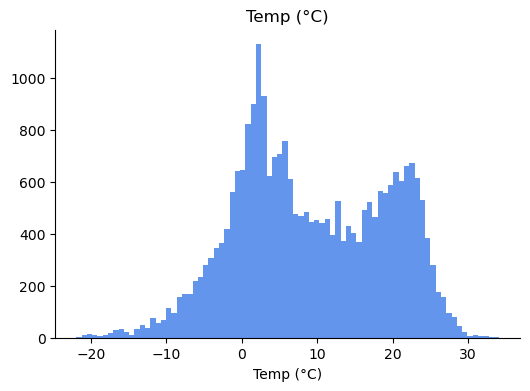


---------------------------------------------
Dew Point Temp (°C)
---------------------------------------------
        


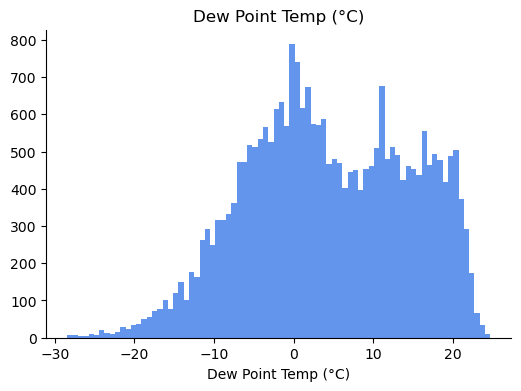


---------------------------------------------
Rel Hum (%)
---------------------------------------------
        


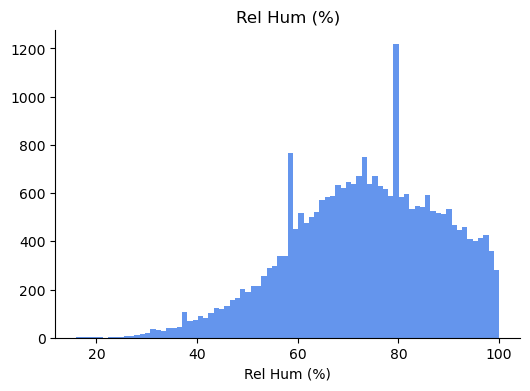


---------------------------------------------
Visibility (km)
---------------------------------------------
        


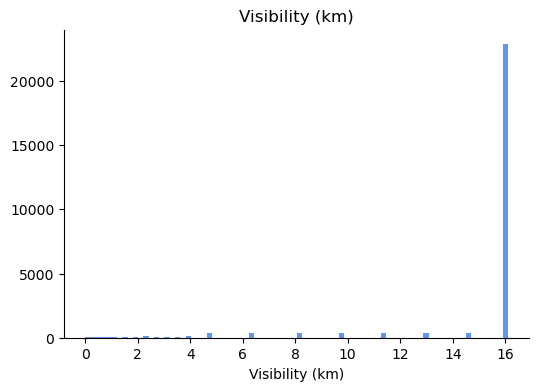


---------------------------------------------
Stn Press (kPa)
---------------------------------------------
        


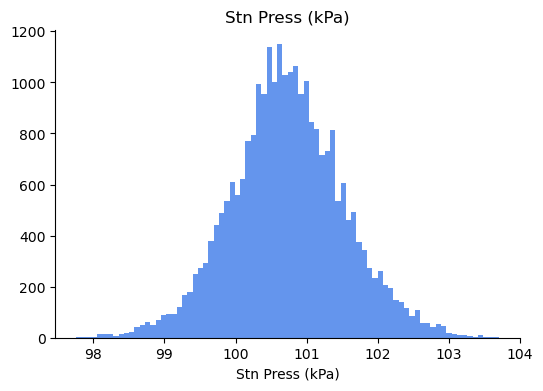


---------------------------------------------
Hmdx
---------------------------------------------
        


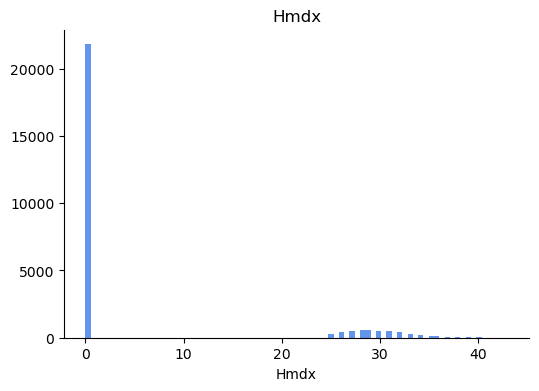


---------------------------------------------
Wind Chill
---------------------------------------------
        


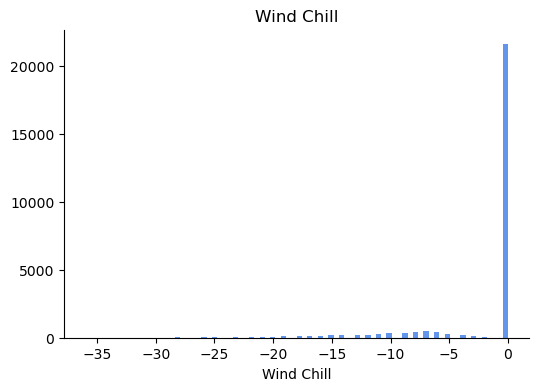


---------------------------------------------
Strong Wind
---------------------------------------------
        


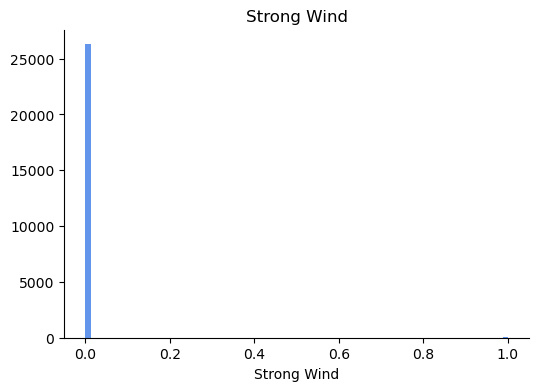


---------------------------------------------
Blowing Snow
---------------------------------------------
        


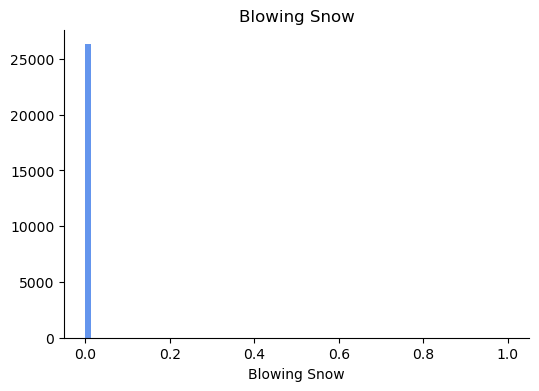


---------------------------------------------
Clear
---------------------------------------------
        


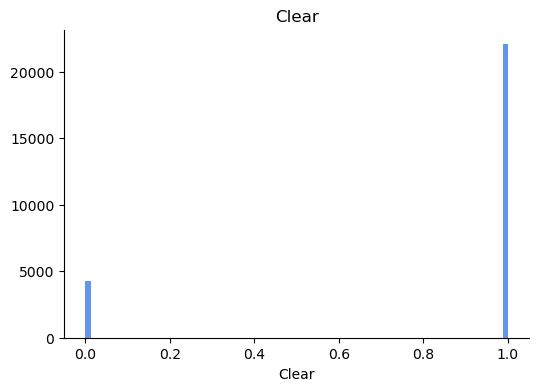


---------------------------------------------
Fog
---------------------------------------------
        


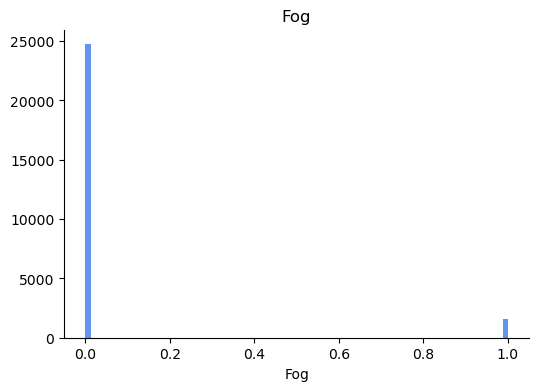


---------------------------------------------
Freezing Rain
---------------------------------------------
        


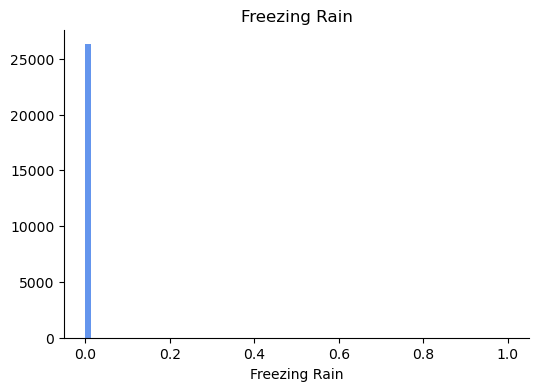


---------------------------------------------
Haze
---------------------------------------------
        


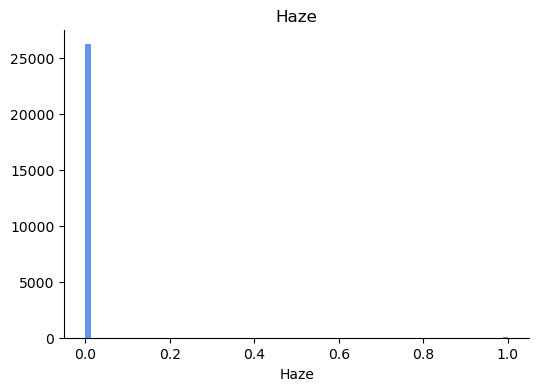


---------------------------------------------
Heavy Rain
---------------------------------------------
        


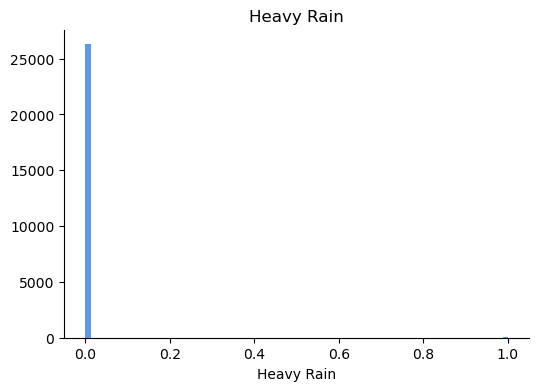


---------------------------------------------
Heavy Snow
---------------------------------------------
        


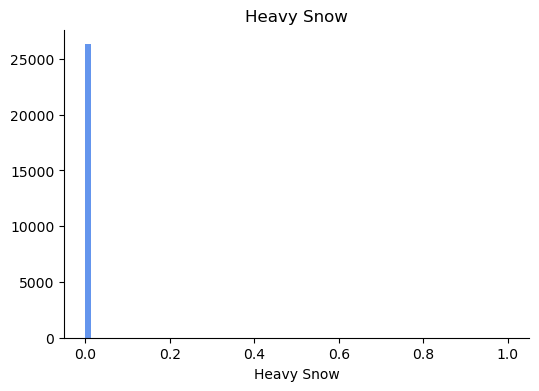


---------------------------------------------
Moderate Rain
---------------------------------------------
        


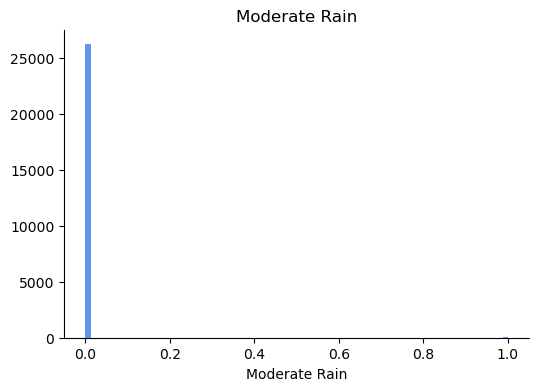


---------------------------------------------
Moderate Snow
---------------------------------------------
        


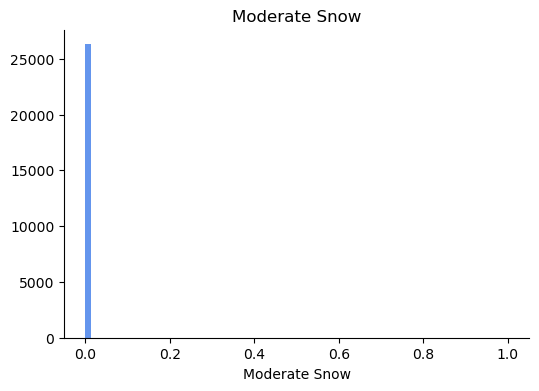


---------------------------------------------
Rain
---------------------------------------------
        


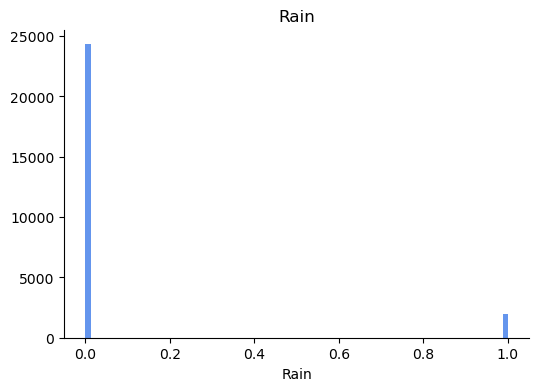


---------------------------------------------
Snow
---------------------------------------------
        


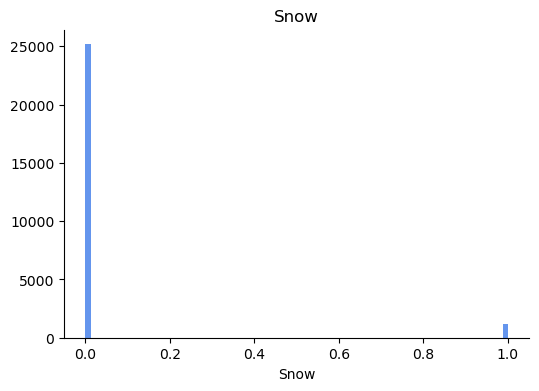


---------------------------------------------
Thunderstorms
---------------------------------------------
        


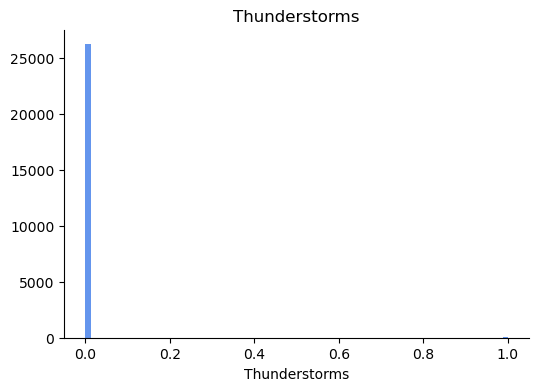

In [150]:
for col in weather_df.columns[1:]:
    try:
        print(f"""
---------------------------------------------
{col}
---------------------------------------------
        """)
        plt.figure(figsize=(6, 4))
        plt.title(col)
        plt.hist(weather_df[col], color='cornflowerblue', bins=80)
        plt.xlabel(col)
        sns.despine()
        plt.show()
    except KeyError:
        pass

**_Observations_**
- Most common `Temp (°C)` peaks around 2°C and around 22°C
- Most common `Dew Point Temp (°C)` peaks around 0°C and drops off above 20°C and distribution has a left skew
- Most common `Rel Hum (%)` peaks around 75% and distribution has a left skew
- `Stn Press (kPa)` has a normal distribution with the peak between 100-101kPa
- Normal Rain, Snow and Fog are the most common Weather Events

In [151]:
%store weather_type_df

Stored 'weather_type_df' (DataFrame)


In [152]:
weather_type_df

,Date/Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather,Strong Wind
0,2018-01-01 00:00:00,-16.2,-20.5,70.0,16.1,102.13,0.0,-22.0,Clear,0
1,2018-01-01 01:00:00,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,Clear,0
2,2018-01-01 02:00:00,-17.3,-20.8,75.0,16.1,102.15,0.0,-26.0,Clear,0
3,2018-01-01 03:00:00,-17.9,-21.6,73.0,16.1,102.13,0.0,-24.0,Clear,0
4,2018-01-01 04:00:00,-17.2,-21.1,72.0,16.1,102.09,0.0,-21.0,Clear,0
...,...,...,...,...,...,...,...,...,...,...
26299,2020-12-31 19:00:00,0.1,-3.3,78.0,16.1,101.86,0.0,0.0,Clear,0
26300,2020-12-31 20:00:00,0.0,-4.0,74.0,16.1,101.96,0.0,-4.0,Clear,0
26301,2020-12-31 21:00:00,0.4,-4.5,70.0,16.1,102.02,0.0,0.0,Clear,0
26302,2020-12-31 22:00:00,-0.1,-4.9,70.0,16.1,102.13,0.0,-4.0,Clear,0


In [153]:
# Save cleaned dataset to new csv
#weather_df.to_csv('/Users/nicolechan/Downloads/Toronto_Ridership_2018_2020/weather18_20.csv')

### Part 4: Creating Master Dataframe

Back to [Table of Contents](#Table-of-Contents).<br>

This section combine above dataframe into one final dataset to be used for EDA and Modelling in the next notebook. 

**_Next Steps_**:
1. Merge the Trip & Weather Datasets
2. Merge `station_info`
3. Clean/Reorganize

#### *Issue 1: Merge Trip & Weather Datasets*

In [154]:
# To prep the trips data set to be merged with the weather dataset, we need to round the start time
# to nearest hour and save it to a temp column to use as key to join weather df
trips18_20['start_hour'] = trips18_20['Start Time'].dt.round('H')

In [155]:
# Merge trip and weather data sets
df18_20 = pd.merge(trips18_20, weather_df, 
              how='left', 
              left_on='start_hour', right_on='Date/Time')

# Check if merge is successful
print("\n**df18_20 dataset**")
display(df18_20.head(3))


**df18_20 dataset**


,Trip Id,Trip Duration (Seconds),Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Member,Weekend,Holiday,start_hour,Date/Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,Blowing Snow,Clear,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
0,2383648,393,2018-01-01 00:47:00,7018,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,1,0,1,2018-01-01 01:00:00,2018-01-01 01:00:00,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2383649,625,2018-01-01 00:52:00,7184,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),1,0,1,2018-01-01 01:00:00,2018-01-01 01:00:00,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2383650,233,2018-01-01 00:55:00,7235,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,1,0,1,2018-01-01 01:00:00,2018-01-01 01:00:00,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
# Dropping `start_time` and `Date/Time` as these are not necessary features going forward in the analysis
df18_20.drop(['start_hour', 'Date/Time'], axis=1, inplace=True)

#### *Issue 3: Reorganize Dataframe*

In [157]:
# Reorganize columns
df18_20 = df18_20[['Trip Id',
                   'Start Time',
                   'Start Station Id',
                   'Start Station Name',
                   'End Time',
                   'End Station Id',
                   'End Station Name',
                   'Trip Duration (Seconds)',
                   'Member',
                   'Weekend',
                   'Holiday',
                   'Temp (°C)',
                   'Dew Point Temp (°C)',
                   'Rel Hum (%)',
                   'Visibility (km)',
                   'Stn Press (kPa)',
                   'Hmdx',          
                   'Wind Chill',  
                   'Clear',
                   'Strong Wind',    
                   'Blowing Snow',   
                   'Fog',            
                   'Freezing Rain',  
                   'Haze',           
                   'Heavy Rain',     
                   'Heavy Snow',     
                   'Moderate Rain',  
                   'Moderate Snow',  
                   'Rain',           
                   'Snow',           
                   'Thunderstorms']]

# Column Label Check
display(df18_20.columns)

Index(['Trip Id', 'Start Time', 'Start Station Id', 'Start Station Name',
       'End Time', 'End Station Id', 'End Station Name',
       'Trip Duration (Seconds)', 'Member', 'Weekend', 'Holiday', 'Temp (°C)',
       'Dew Point Temp (°C)', 'Rel Hum (%)', 'Visibility (km)',
       'Stn Press (kPa)', 'Hmdx', 'Wind Chill', 'Clear', 'Strong Wind',
       'Blowing Snow', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Heavy Snow', 'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow',
       'Thunderstorms'],
      dtype='object')

In [158]:
# Check for null values
print(f"""
Total Number of Null values:\n\n{df18_20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{df18_20.isna().mean()*100}\n""")


Total Number of Null values:

Trip Id                     0
Start Time                  0
Start Station Id            0
Start Station Name          0
End Time                    0
End Station Id              0
End Station Name            0
Trip Duration (Seconds)     0
Member                      0
Weekend                     0
Holiday                     0
Temp (°C)                  28
Dew Point Temp (°C)        28
Rel Hum (%)                28
Visibility (km)            28
Stn Press (kPa)            28
Hmdx                       28
Wind Chill                 28
Clear                      28
Strong Wind                28
Blowing Snow               28
Fog                        28
Freezing Rain              28
Haze                       28
Heavy Rain                 28
Heavy Snow                 28
Moderate Rain              28
Moderate Snow              28
Rain                       28
Snow                       28
Thunderstorms              28
dtype: int64

-------------------------

In [159]:
# View rows with null values
df18_20[df18_20.isna().any(axis=1)].head()

,Trip Id,Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Trip Duration (Seconds),Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Clear,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
7270406,10644190,2020-12-31 23:30:00,7055,Jarvis St / Carlton St,2020-12-31 23:35:00,7418,College Park - Yonge St Entrance,321,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7270407,10644191,2020-12-31 23:32:00,7177,East Liberty St / Pirandello St,2021-01-01 00:26:00,7259,Lower Spadina Ave / Lake Shore Blvd,3276,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7270408,10644192,2020-12-31 23:32:00,7177,East Liberty St / Pirandello St,2021-01-01 00:27:00,7259,Lower Spadina Ave / Lake Shore Blvd,3273,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7270409,10644193,2020-12-31 23:34:00,7481,Westmount Ave / St Clair Ave W - SMART,2020-12-31 23:53:00,7528,Spadina Rd / Austin Terrace - SMART,1156,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7270410,10644194,2020-12-31 23:34:00,7481,Westmount Ave / St Clair Ave W - SMART,2020-12-31 23:53:00,7528,Spadina Rd / Austin Terrace - SMART,1138,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears that there are null values create int Start Station and End Station information, the null values need to be dropped.

In [160]:
# Forwardfill any weather null values
df18_20[['Temp (°C)', 
         'Dew Point Temp (°C)',
         'Rel Hum (%)',        
         'Visibility (km)',    
         'Stn Press (kPa)', 
         'Hmdx',            
         'Wind Chill',   
         'Clear',
         'Strong Wind',        
         'Blowing Snow',       
         'Fog',                
         'Freezing Rain',      
         'Haze',               
         'Heavy Rain',         
         'Heavy Snow',         
         'Moderate Rain',      
         'Moderate Snow',      
         'Rain',               
         'Snow',               
         'Thunderstorms']] = df18_20[['Temp (°C)', 
                                      'Dew Point Temp (°C)',
                                      'Rel Hum (%)',        
                                      'Visibility (km)',    
                                      'Stn Press (kPa)', 
                                      'Hmdx',            
                                      'Wind Chill',    
                                      'Clear',
                                      'Strong Wind',        
                                      'Blowing Snow',       
                                      'Fog',                
                                      'Freezing Rain',      
                                      'Haze',               
                                      'Heavy Rain',         
                                      'Heavy Snow',         
                                      'Moderate Rain',      
                                      'Moderate Snow',      
                                      'Rain',               
                                      'Snow',               
                                      'Thunderstorms']].fillna(method='ffill')

In [161]:
# Drop null values
df18_20.dropna(inplace=True)

In [162]:
# Final check for null values
print(f"""
**df18_20 dataset**\n
Total Number of Null values:\n\n{df18_20.isna().sum()}\n
----------------------------------------\n
Total Percentage of Null values:\n\n{df18_20.isna().mean()*100}\
""")


**df18_20 dataset**

Total Number of Null values:

Trip Id                    0
Start Time                 0
Start Station Id           0
Start Station Name         0
End Time                   0
End Station Id             0
End Station Name           0
Trip Duration (Seconds)    0
Member                     0
Weekend                    0
Holiday                    0
Temp (°C)                  0
Dew Point Temp (°C)        0
Rel Hum (%)                0
Visibility (km)            0
Stn Press (kPa)            0
Hmdx                       0
Wind Chill                 0
Clear                      0
Strong Wind                0
Blowing Snow               0
Fog                        0
Freezing Rain              0
Haze                       0
Heavy Rain                 0
Heavy Snow                 0
Moderate Rain              0
Moderate Snow              0
Rain                       0
Snow                       0
Thunderstorms              0
dtype: int64

-----------------------------------

In [163]:
# Save cleaned datasets to new csv
#df18_20.to_csv('/Users/nicolechan/Downloads/Toronto_Ridership_2018_2020/df18_20.csv') 

## Section 3: Exploratory Data Analysis

Back to [Table of Contents](#Table-of-Contents).<br>

This section will be devoted to an exploratory data analysis of our cleaned dataset and will have a conclusion of all the insights we can find in the data.

In [164]:
# Display most and least used stations of 2018
trips18.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
76,7076,York St / Queens Quay W,24017
16,7016,Bay St / Queens Quay W (Ferry Terminal),22743
33,7033,Union Station,19869
30,7030,Bay St / Wellesley St W,19184
42,7042,Sherbourne St / Wellesley St E,19131
...,...,...,...
328,7359,Rosedale Park (20 Schofield Ave),259
277,7301,Primrose Ave / Davenport Rd,201
348,7380,Erskine Ave / Yonge St SMART,190
355,7387,Mortimer Ave / Carlaw Ave SMART,125


In [165]:
# Display most and least used stations of 2019
trips19.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
76,7076,York St / Queens Quay W,29291
16,7016,Bay St / Queens Quay W (Ferry Terminal),22487
190,7203,Bathurst St/Queens Quay(Billy Bishop Airport),22114
33,7033,Union Station,19424
42,7042,Sherbourne St / Wellesley St E,19179
...,...,...,...
202,7219,Wolfpack - 7219,69
363,7393,55 Magnificent Rd. Garage,3
364,7394,Toronto Bike Shop,2
201,7218,Make Invisible - 7218,2


In [166]:
# Display most and least used stations of 2020
trips20.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
242,7261,Queens Quay E / Lower Sherbourne St,30967
223,7242,Lake Shore Blvd W / Ontario Dr,30466
392,7430,Marilyn Bell Park Tennis Court,26581
167,7175,HTO Park (Queens Quay W),26137
76,7076,York St / Queens Quay W,25738
...,...,...,...
468,7517,Ripley Ave / Ormskirk Ave - SMART,158
573,7625,Guildwood GO Station (North),111
572,7624,Guildwood GO Station (South),85
68,7068,Dockside Dr / Queens Quay E (Sugar Beach),22


In [186]:
# Display most and least used stations of the last 3 years
trips18_20.groupby(['Start Station Id','Start Station Name']).size().reset_index(name='count').sort_values(by = 'count', ascending=False)

,Start Station Id,Start Station Name,count
82,7076,York St / Queens Quay W,79046
16,7016,Bay St / Queens Quay W (Ferry Terminal),67779
203,7203,Bathurst St/Queens Quay(Billy Bishop Airport),59148
180,7175,HTO Park (Queens Quay W),55943
44,7042,Sherbourne St / Wellesley St E,52335
...,...,...,...
216,7219,Wolfpack - 7219,70
395,7394,Toronto Bike Shop,19
394,7393,55 Magnificent Rd. Garage,3
215,7218,Make Invisible - 7218,2


**_Observations_**<br>
- Union Station was once among the busiest stations from 2018 to 2019. However, it was not in 2020, likely due to the city's lockdown measures and the increasing trend of remote work.

- Initially, annual members seemed to use the service frequently, likely because of the popularity of work locations. Over time, there has been a shift towards casual member usage, with the most frequent stations now being along the waterfront.

In [168]:
# Display feature statistics
print("\n**df18_20 dataset**")
display(df18_20.describe().apply(lambda x: x.apply('{0:.2f}'.format)))


**df18_20 dataset**


,Trip Id,Start Time,Start Station Id,End Time,End Station Id,Trip Duration (Seconds),Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Clear,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
count,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00,7270434.00
mean,6516894.14,.2f,7195.97,.2f,7195.29,1070.36,0.73,0.13,0.01,15.66,9.89,69.83,15.63,100.69,10.88,-0.50,0.93,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.01,0.00
min,2383648.00,.2f,7000.00,.2f,7000.00,0.00,0.00,0.00,0.00,-21.90,-28.40,16.00,0.00,97.76,0.00,-35.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4456387.25,.2f,7060.00,.2f,7059.00,445.00,0.00,0.00,0.00,9.60,3.80,60.00,16.10,100.26,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6506517.50,.2f,7175.00,.2f,7175.00,734.00,1.00,0.00,0.00,18.20,11.60,71.00,16.10,100.65,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,8578109.75,.2f,7288.00,.2f,7288.00,1157.00,1.00,0.00,0.00,22.70,17.00,81.00,16.10,101.11,28.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,10644217.00,.2f,7658.00,.2f,7658.00,12403785.00,1.00,1.00,1.00,34.10,24.70,100.00,16.10,103.71,43.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,2374526.64,nan,150.32,nan,150.02,11570.67,0.44,0.34,0.11,8.71,8.84,14.72,2.08,0.67,14.57,2.35,0.26,0.01,0.01,0.16,0.01,0.07,0.03,0.00,0.04,0.01,0.19,0.10,0.06


In [169]:
# Calculate summary statistics
summary_stats = df18_20.describe()

# Save to Excel
summary_stats.to_excel("summary_stats.xlsx")

**_Observations_**

- Longest Trip Duration is 206,730 minutes
- Mean Trip Duration is 17.8  minutes with a standard deviation of 191
- 50% of all trips end at 12 minutes
- The hottest temperature the last 3 years was 34.1°C and the coldest was -21.9°C
- The highest relative humidity recorded in the last 4 years was 81% and the lowest was 16%

dropping datapoints where trips exceed a threshold.

Based on the Toronto BikeShare Usage Fees
https://bikesharetoronto.com/get-pass/

From Bike Share Toronto, trips lasting less than 1 minute can be considered false trips. Remove all trips from trips_data with a duration less than 60 seconds

In [170]:
df18_20= df18_20[df18_20['Trip Duration (Seconds)'] >= 60]
df18_20

,Trip Id,Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Trip Duration (Seconds),Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Clear,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
0,2383648,2018-01-01 00:47:00,7018,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,393,1,0,1,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2383649,2018-01-01 00:52:00,7184,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),625,1,0,1,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2383650,2018-01-01 00:55:00,7235,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,233,1,0,1,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2383651,2018-01-01 00:57:00,7202,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,1138,1,0,1,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2383652,2018-01-01 01:00:00,7004,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,703,1,0,1,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270429,10644213,2020-12-31 23:52:00,7010,King St W / Spadina Ave,2020-12-31 23:57:00,7216,Wellington St W / Stafford St,330,1,0,0,-1.0,-4.9,75.0,16.1,102.13,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7270430,10644214,2020-12-31 23:54:00,7288,Humber Bay Shores Park West,2020-12-31 23:58:00,7514,Humber Bay Shores Park / Marine Parade Dr,216,1,0,0,-1.0,-4.9,75.0,16.1,102.13,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7270431,10644215,2020-12-31 23:54:00,7288,Humber Bay Shores Park West,2020-12-31 23:58:00,7514,Humber Bay Shores Park / Marine Parade Dr,204,1,0,0,-1.0,-4.9,75.0,16.1,102.13,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7270432,10644216,2020-12-31 23:56:00,7270,Church St / Dundas St E - SMART,2021-01-01 00:24:00,7270,Church St / Dundas St E - SMART,1659,1,0,0,-1.0,-4.9,75.0,16.1,102.13,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Outliers
Next, remove any `'Trip Duration'` values less than `Q1 - 1.5 * IQR` and greater than `Q3 + 1.5 * IQR`. 

- Q1: The first quartile (`.quantile(0.25)`)
- Q3: The third quartile (`.quantile(0.75)`)
- IQR: The first quartil (`Q3 - Q1`)
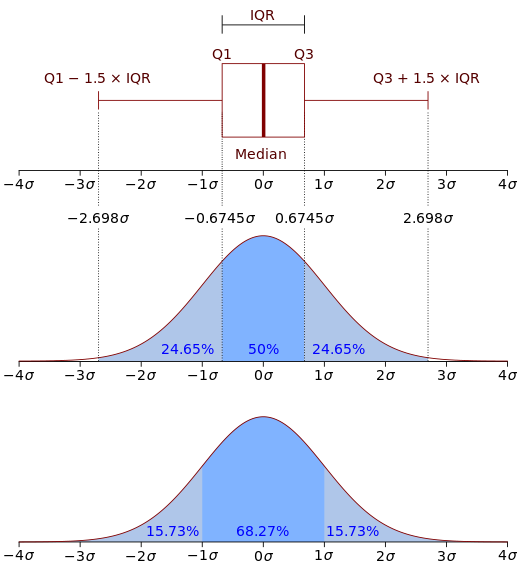

In [171]:
Q1, Q3 = df18_20['Trip Duration (Seconds)'].quantile(0.25), df18_20['Trip Duration (Seconds)'].quantile(0.75)
IQR = Q3 - Q1
df18_20 = df18_20[(df18_20['Trip Duration (Seconds)'] > (Q1 - 1.5 * IQR)) & 
                        (df18_20['Trip Duration (Seconds)'] < (Q3 + 1.5 * IQR))]

# View DataFrame
df18_20.head()

,Trip Id,Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Trip Duration (Seconds),Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Clear,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
0,2383648,2018-01-01 00:47:00,7018,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,393,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2383649,2018-01-01 00:52:00,7184,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),625,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2383650,2018-01-01 00:55:00,7235,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,233,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2383651,2018-01-01 00:57:00,7202,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,1138,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2383652,2018-01-01 01:00:00,7004,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,703,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plot a histogram + density plot using sns.distplot() of the 'Trip Duration'. Ensure that 'Trip Duration' is displayed in minutes

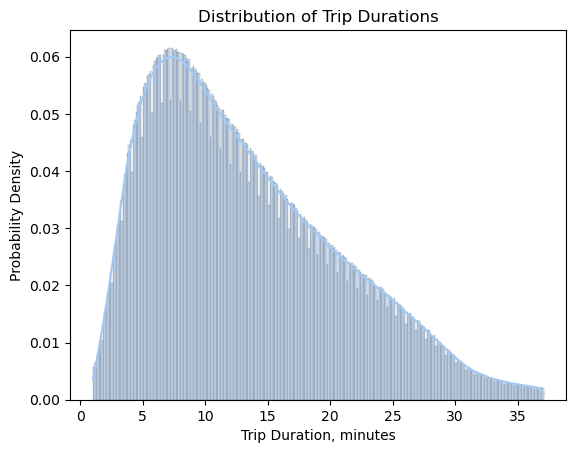

[Text(0.5, 1.0, 'Distribution of Trip Durations'),
 Text(0.5, 24.0, 'Trip Duration, minutes'),
 Text(24.000000000000007, 0.5, 'Probability Density')]

In [172]:
trip_duration_minutes = df18_20['Trip Duration (Seconds)'] / 60

# Create a histogram
ax = sns.histplot(trip_duration_minutes, kde=True, stat="density")

# Set titles and labels
ax.set(title="Distribution of Trip Durations", xlabel="Trip Duration, minutes", ylabel="Probability Density")

# Show the plot
plt.show()
ax.set(title="Distribution of Trip Durations", xlabel="Trip Duration, minutes", ylabel="Probability Density")

### Duplicates 

In [173]:
#Remove any entries from trips_data which have the same 'Trip Id'
df18_20 = df18_20.drop_duplicates(subset='Trip Id')
df18_20.head()

,Trip Id,Start Time,Start Station Id,Start Station Name,End Time,End Station Id,End Station Name,Trip Duration (Seconds),Member,Weekend,Holiday,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Clear,Strong Wind,Blowing Snow,Fog,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms
0,2383648,2018-01-01 00:47:00,7018,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,393,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2383649,2018-01-01 00:52:00,7184,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),625,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2383650,2018-01-01 00:55:00,7235,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,233,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2383651,2018-01-01 00:57:00,7202,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,1138,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2383652,2018-01-01 01:00:00,7004,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,703,1,0,1,-16.8,-21.1,70.0,16.1,102.1,0.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
# List of weather types
weather_types = ['Clear', 'Strong Wind', 'Blowing Snow', 'Fog', 'Freezing Rain', 'Haze',
                  'Heavy Rain', 'Heavy Snow', 'Moderate Rain', 'Moderate Snow',
                  'Rain', 'Snow', 'Thunderstorms']

# Count the number of 1s in each weather type column
weather_type_counts = df18_20[weather_types].sum()

# Display the counts
print(weather_type_counts)


Clear            6424988.0
Strong Wind         1362.0
Blowing Snow         191.0
Fog               188490.0
Freezing Rain        485.0
Haze               33864.0
Heavy Rain          7393.0
Heavy Snow            57.0
Moderate Rain      12410.0
Moderate Snow        290.0
Rain              263937.0
Snow               76661.0
Thunderstorms      22390.0
dtype: float64


### Analysis of 'User Type'

I will explore the daily number for Annual Members and Casual Members. Casual Members pay on a per ride basis while Annual Members pay a monthly subcription fee. Create a new DataFrame called `data_days` with three columns:
- ride: The total number of rides for a particular day.
- annual_members: Number of rides by Annual Members.
- casual_members: Number of rides by Casual Members.
- workday: Was this day a workday (True) or a weekend day (False).

Checked that the number of rows in `data_merged` is equal to the sum of `data_days['rides']`.

-annual_members: Number of rides by Annual Members.
-casual_members: Number of rides by Casual Members.
-Use sns.distplot() to  create a plot showing the distributions of daily ride counts for Casual Members and Annual Members.   

In [175]:
data_days = df18_20.groupby(df18_20['Start Time'].dt.floor('D')).agg(
    rides=('Trip Id', 'count'),
    annual_members=('Member', lambda x: (x == 1).sum()),
    casual_members=('Member', lambda x: (x == 0).sum()),
    temperature=('Temp (°C)', max),
    workday=('Start Time', lambda x: x.iloc[0].dayofweek < 5)
)
    
# View DataFrame
data_days.head()

,rides,annual_members,casual_members,temperature,workday
Start Time,,,,,
2018-01-01,243,235,8,-8.0,True
2018-01-02,954,935,19,-6.6,True
2018-01-03,1181,1166,15,-5.0,True
2018-01-04,1170,1154,16,-7.6,True
2018-01-05,783,773,10,-15.2,True


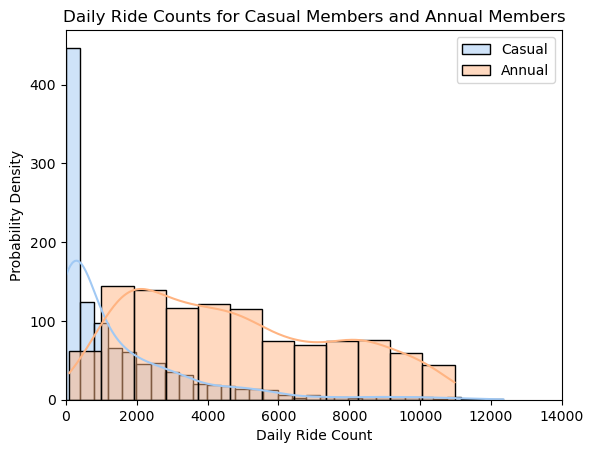

In [187]:
# Use displot or histplot
# displot (figure-level function)
# sns.displot(data_days['casual_members'], label="Casual", kde=True)
# sns.displot(data_days['annual_members'], label="Annual", kde=True)

# histplot (axes-level function)
ax = sns.histplot(data_days['casual_members'], label="Casual", kde=True)
sns.histplot(data_days['annual_members'], label="Annual", kde=True)

ax.set(title='Daily Ride Counts for Casual Members and Annual Members', 
       xlabel='Daily Ride Count', ylabel='Probability Density')
plt.legend()
plt.xlim(0, 14000)
plt.show()


In [177]:
%store data_days

Stored 'data_days' (DataFrame)


Use `sns.scatterplot()` to create a scatter plot showing the relationship between daily ride counts from `data_days` for Casual Members and Annual Members. 

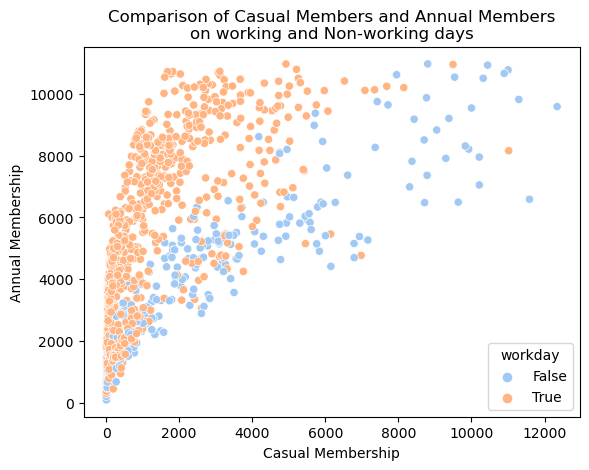

In [178]:
ax = sns.scatterplot(data_days, x='casual_members', y='annual_members', hue='workday')
ax.set(title="Comparison of Casual Members and Annual Members\non working and Non-working days", xlabel="Casual Membership", ylabel="Annual Membership")
plt.legend(title='workday')

some interesting outliers have appeared. In particular, there are some `workday` data points that appear to follow the `non-workday` trend. They could be attributed to holidays. So far, workday filtering was done by looking at day-of-the-week, hence holidays such as Black Friday, which is guaranteed to be a friday, counts as a workday. 

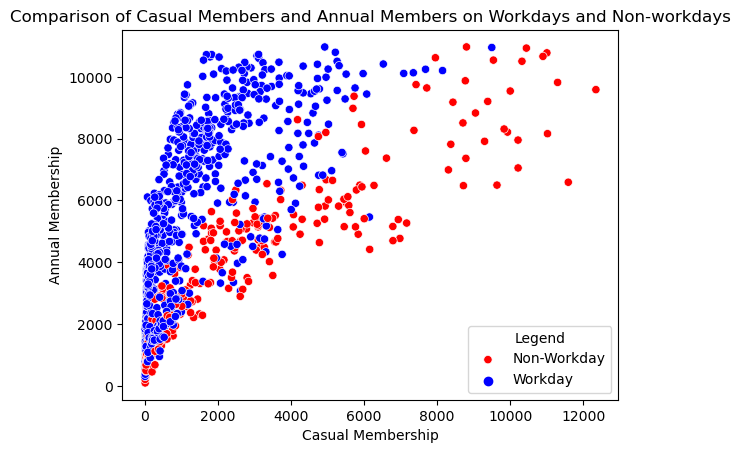

In [195]:
from datetime import date, timedelta
from holidays import Canada
# Function to check if a date is a holiday

def is_holiday(dt):
    ca_holidays = Canada(years=dt.year)
    return dt.date() in ca_holidays

# Create a new column 'holiday' to mark holidays
data_days['holiday'] = data_days.index.to_series().apply(lambda x: is_holiday(x))

# Create a new column 'non_workday' to mark non-working days (weekend + holiday)
data_days['non_workday'] = (data_days['workday'] == False) | (data_days['holiday'] == True)

# Create a scatter plot with workday and non-workday included
ax = sns.scatterplot(data=data_days, x='casual_members', y='annual_members', hue='non_workday', palette={False: 'blue', True: 'red'})

# Set plot title and labels
ax.set(title="Comparison of Casual Members and Annual Members on Workdays and Non-workdays", xlabel="Casual Membership", ylabel="Annual Membership")

# Display the legend
plt.legend(title='Legend', labels=['Non-Workday', 'Workday'])

# Show the plot
plt.show()

Create a plot showing the average number of hourly rides for Annual Members and Casual Memebers. 

In [179]:
data_hours = df18_20.groupby(df18_20['Start Time'].dt.hour).agg(
    rides=('Trip Id', 'count'),
    annual_members=('Member', lambda x: (x == 1).sum()),
    casual_members=('Member', lambda x: (x == 0).sum()),
)

# Divide by the number of days in sample
data_hours /= len(df18_20['Start Time'].dt.date.unique())


[Text(0.5, 1.0, 'Average Hourly Rides per Day'),
 Text(0.5, 0, 'Hour of the Day'),
 Text(0, 0.5, 'Average Rides per Hour')]

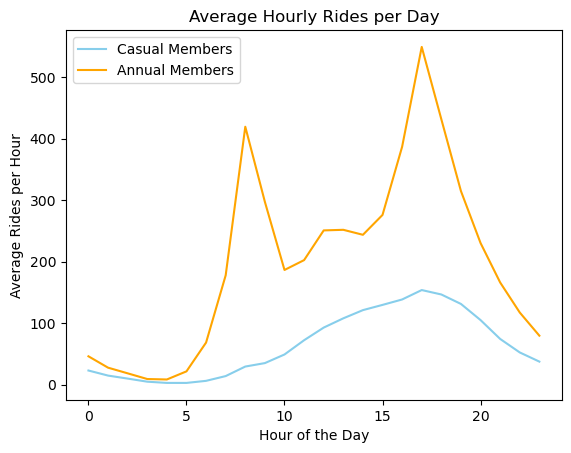

In [202]:
ax = sns.lineplot(data_hours['casual_members'], label='Casual Members', color='#87CEEB')  # Light blue color for Casual Members
ax = sns.lineplot(data_hours['annual_members'], label='Annual Members', color='orange')  # Orange color for Annual Members

ax.set(title='Average Hourly Rides per Day', xlabel='Hour of the Day', ylabel='Average Rides per Hour')


Annual members likely commute to work and ride on a fixed schedule, so ridership peaks during commuting hours. However, casual members are likely visitors to Toronto, so there's no morning peak. Instead, there's a gradual rise in ridership toward the afternoon, peaking around dinner time when tourists are likely the most active.

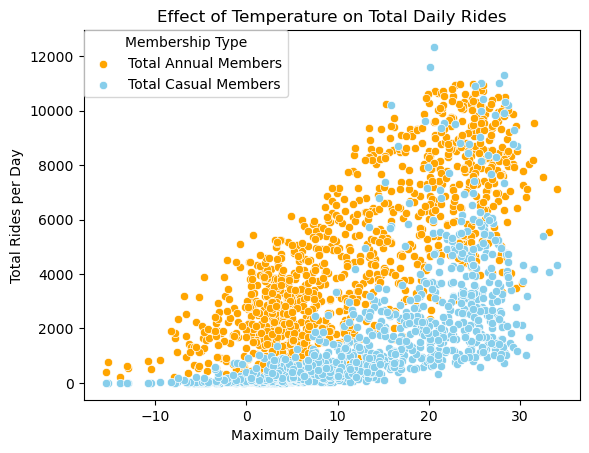

In [201]:
# Create a scatter plot
ax = sns.scatterplot(data=data_days, x='temperature', y='annual_members', label='Total Annual Members', color='#FFA500')
ax = sns.scatterplot(data=data_days, x='temperature', y='casual_members', label='Total Casual Members', color='#87CEEB')

ax.set(title='Effect of Temperature on Total Daily Rides',
       xlabel='Maximum Daily Temperature', ylabel='Total Rides per Day')

# Set legend labels and colors inside the graph
legend_labels = ['Total Annual Members', 'Total Casual Members']
legend_colors = ['#FFA500', '#87CEEB']
ax.legend(labels=legend_labels, handles=ax.collections, title='Membership Type', loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)

plt.show()


<Figure size 1200x800 with 0 Axes>

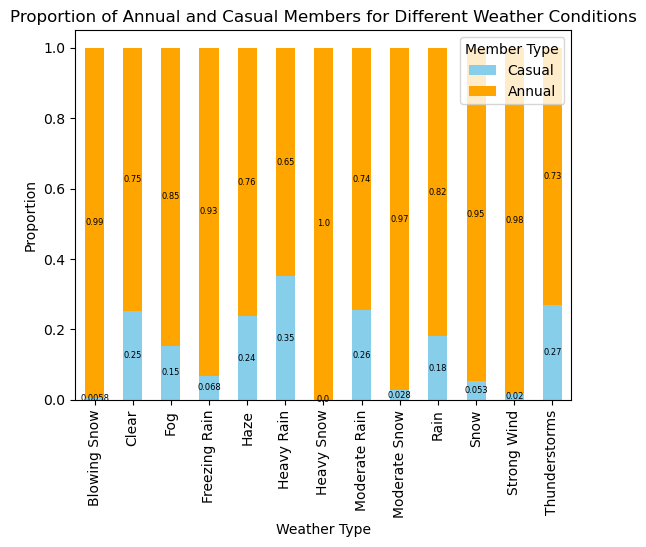

In [196]:
# Create a 'Weather_Type' column by combining the weather type columns
df18_20['Weather_Type'] = df18_20[weather_types].idxmax(axis=1)

# Count the number of annual and casual members for each weather type
weather_type_counts = df18_20.groupby(['Weather_Type', 'Member']).size().unstack().fillna(0)

# Normalize the data along the index (rows)
normalized_weather_type_counts = weather_type_counts.div(weather_type_counts.sum(axis=1), axis=0)

# Plot the normalized stacked bar plot
plt.figure(figsize=(12, 8))
ax = normalized_weather_type_counts.plot(kind='bar', stacked=True, color=['#87CEEB', 'orange'])  # Use lighter blue color

ax.set(title='Proportion of Annual and Casual Members for Different Weather Conditions',
       xlabel='Weather Type', ylabel='Proportion')
plt.legend(title='Member Type', labels=['Casual', 'Annual'], loc='upper right')

# Add text annotations to each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    text_color = 'black'  # Choose text color based on height
    ax.annotate(f'{height:.2}', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=6, color=text_color)

plt.show()


### Histograms

Back to [Table of Contents](#Table-of-Contents).<br>


------------------------------------------------------------
Trip Id
------------------------------------------------------------
    


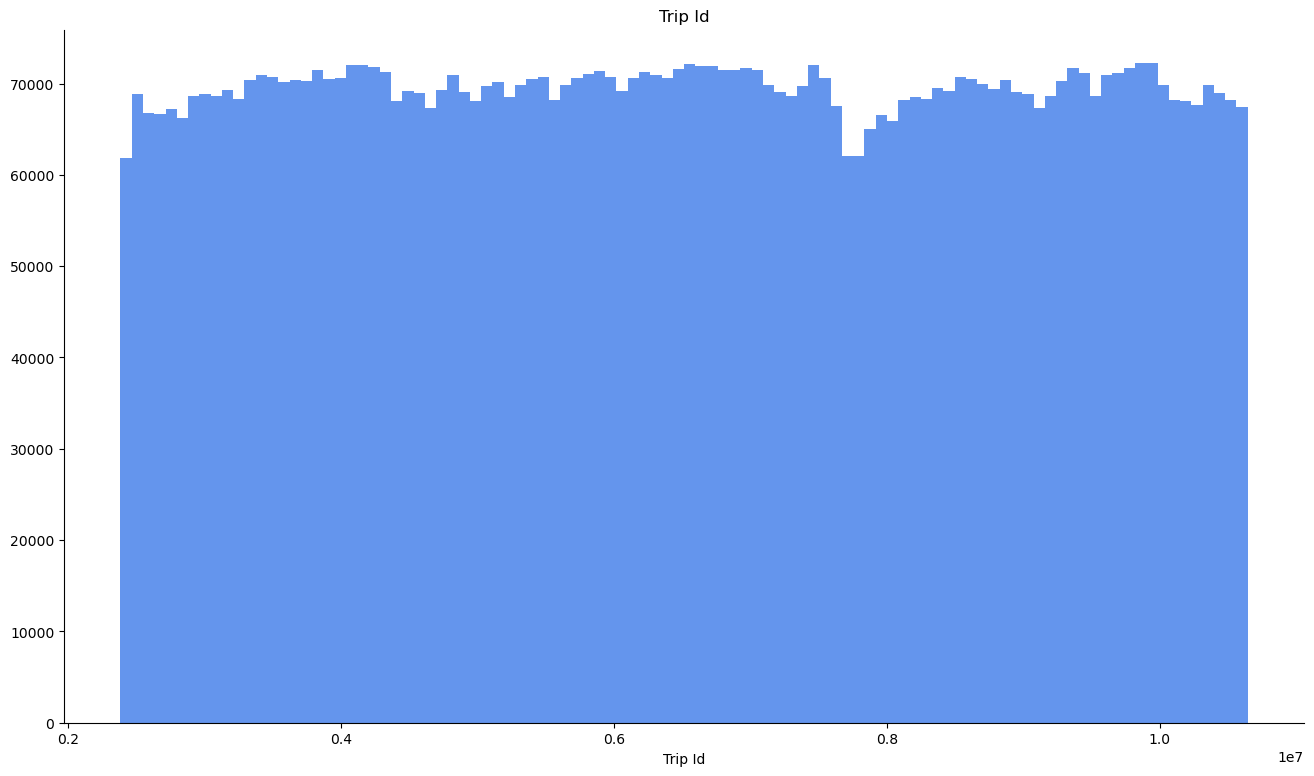


------------------------------------------------------------
Start Time
------------------------------------------------------------
    


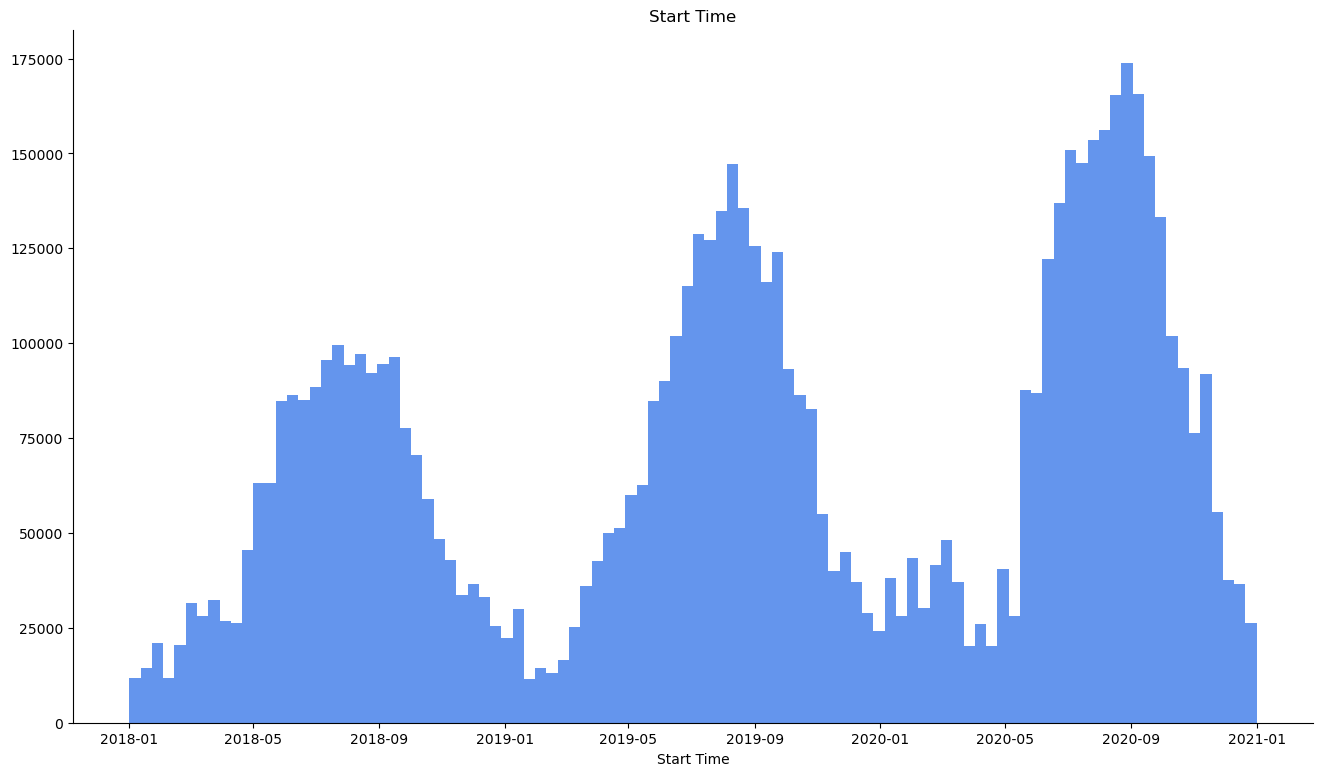


------------------------------------------------------------
Start Station Id
------------------------------------------------------------
    


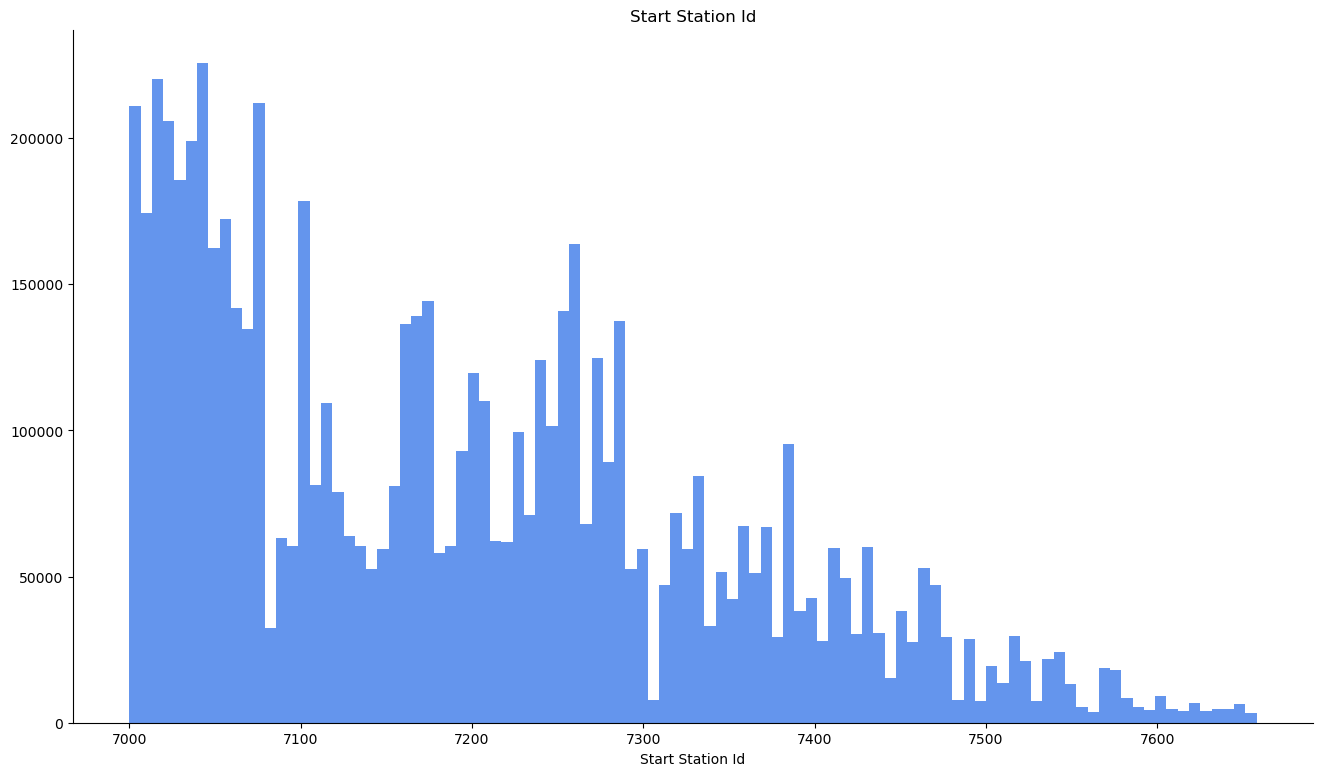


------------------------------------------------------------
Start Station Name
------------------------------------------------------------
    


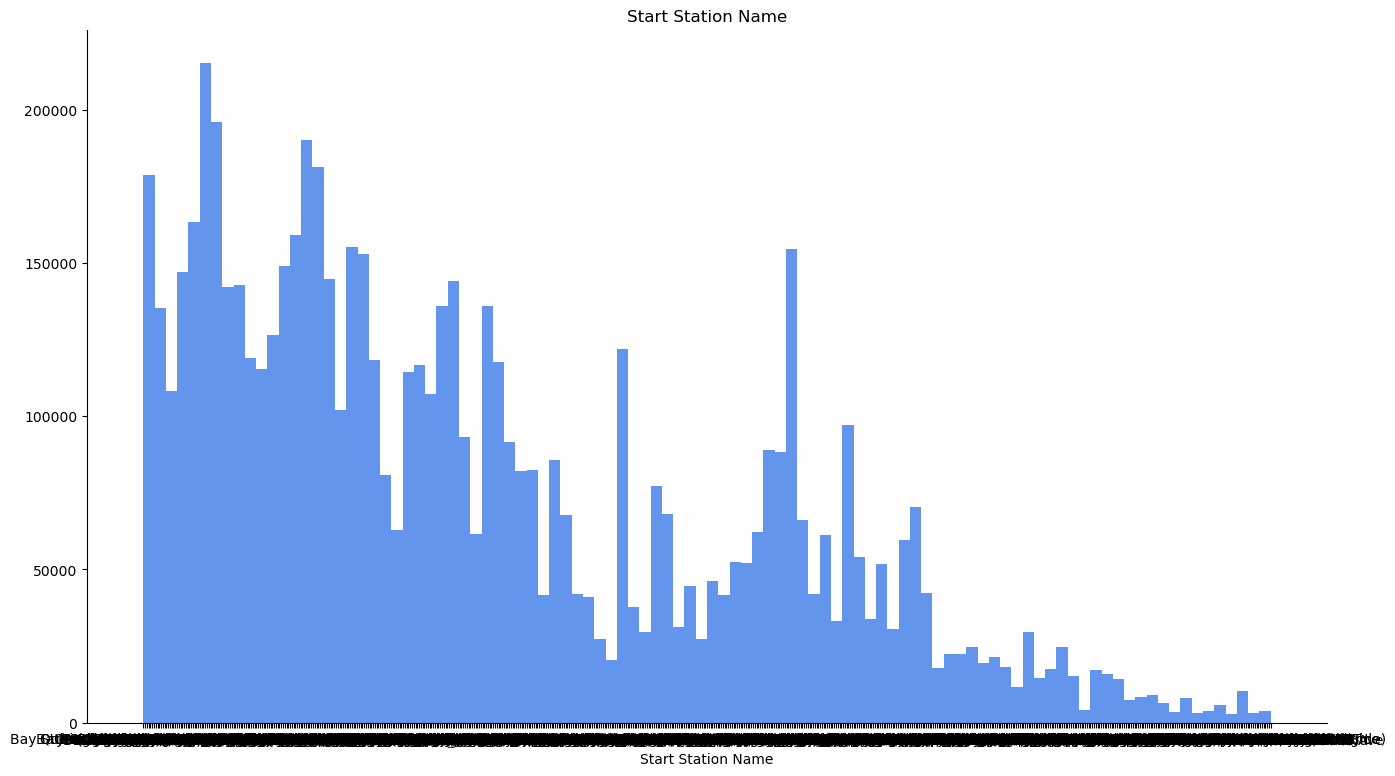


------------------------------------------------------------
End Time
------------------------------------------------------------
    


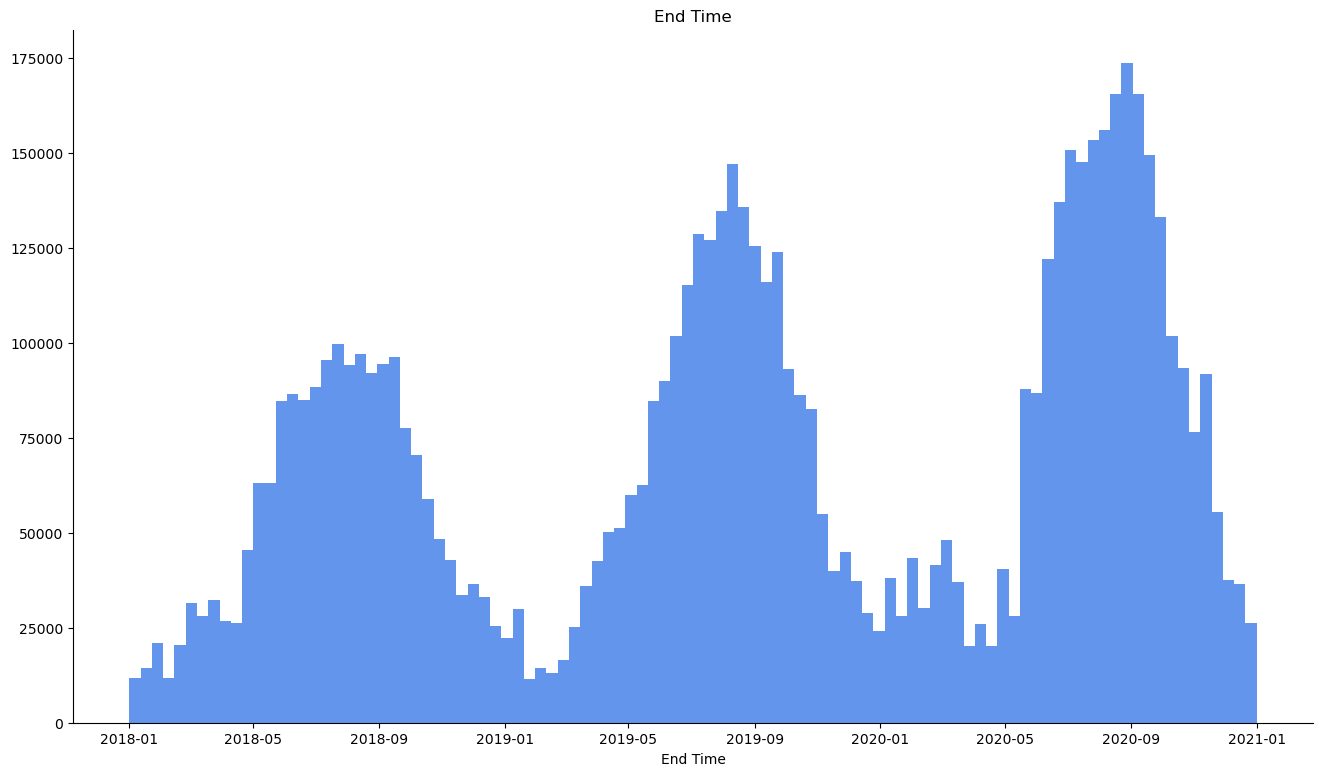


------------------------------------------------------------
End Station Id
------------------------------------------------------------
    


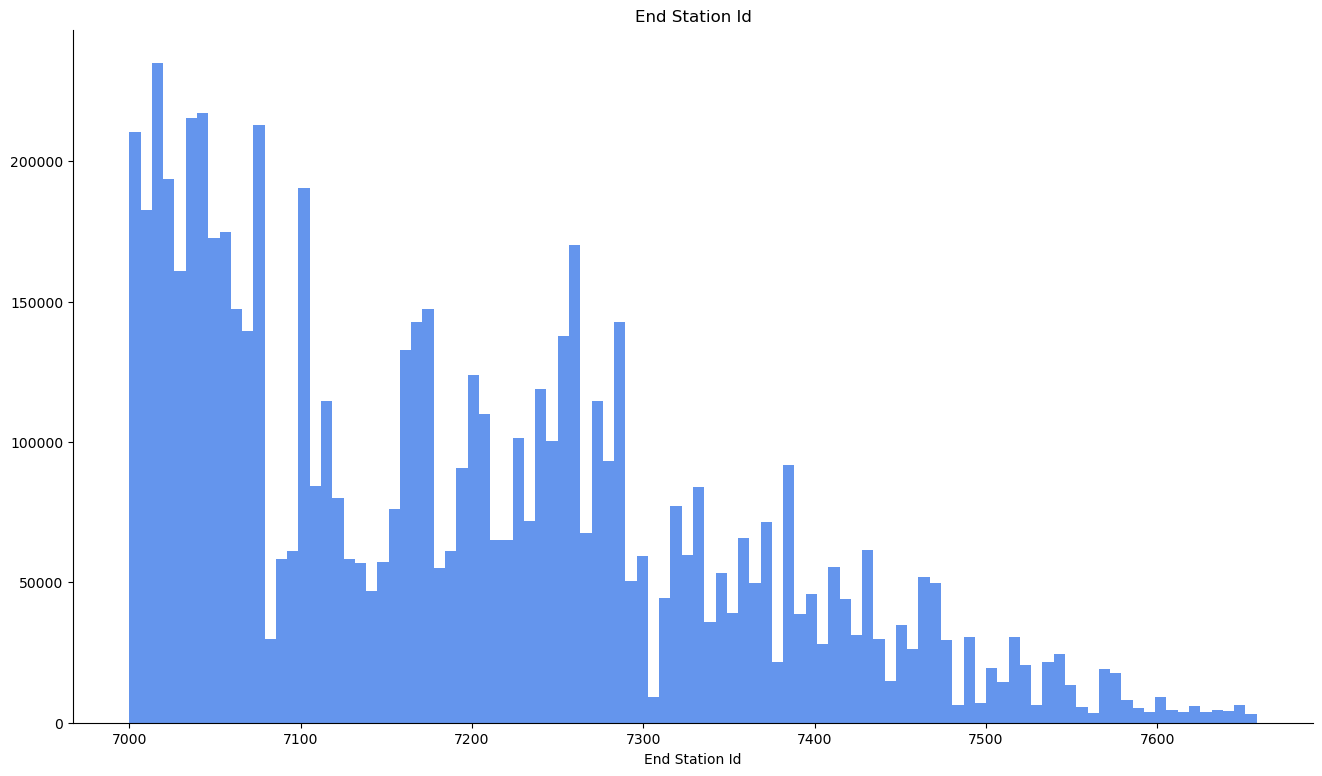


------------------------------------------------------------
End Station Name
------------------------------------------------------------
    


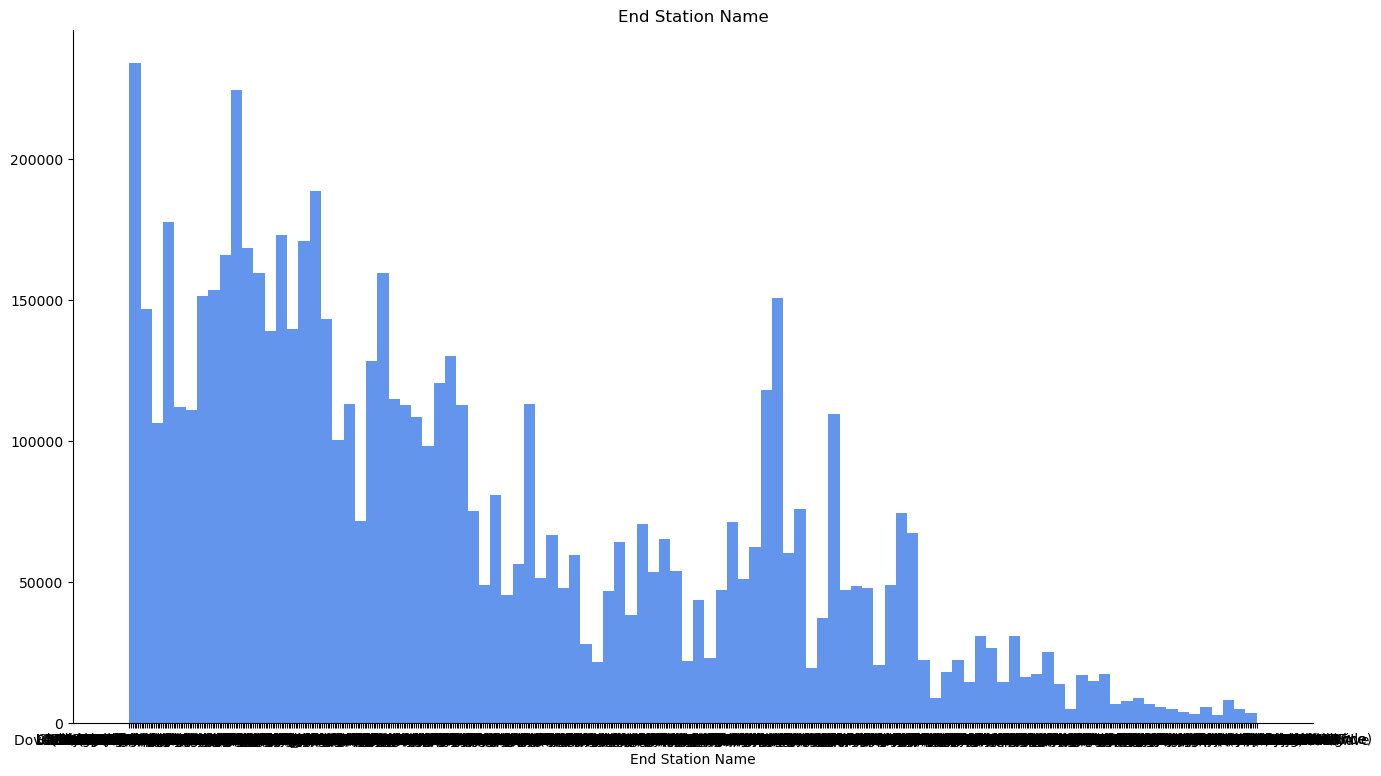


------------------------------------------------------------
Trip Duration (Seconds)
------------------------------------------------------------
    


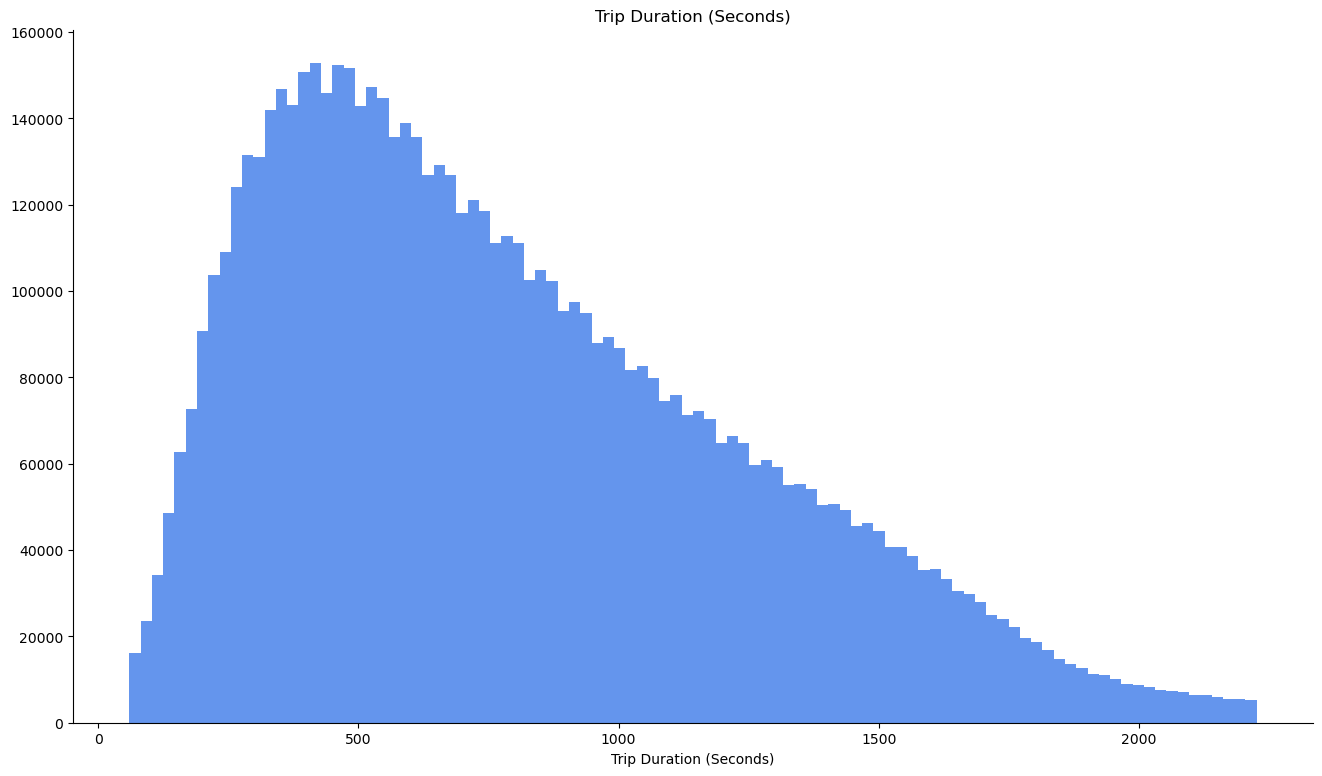


------------------------------------------------------------
Member
------------------------------------------------------------
    


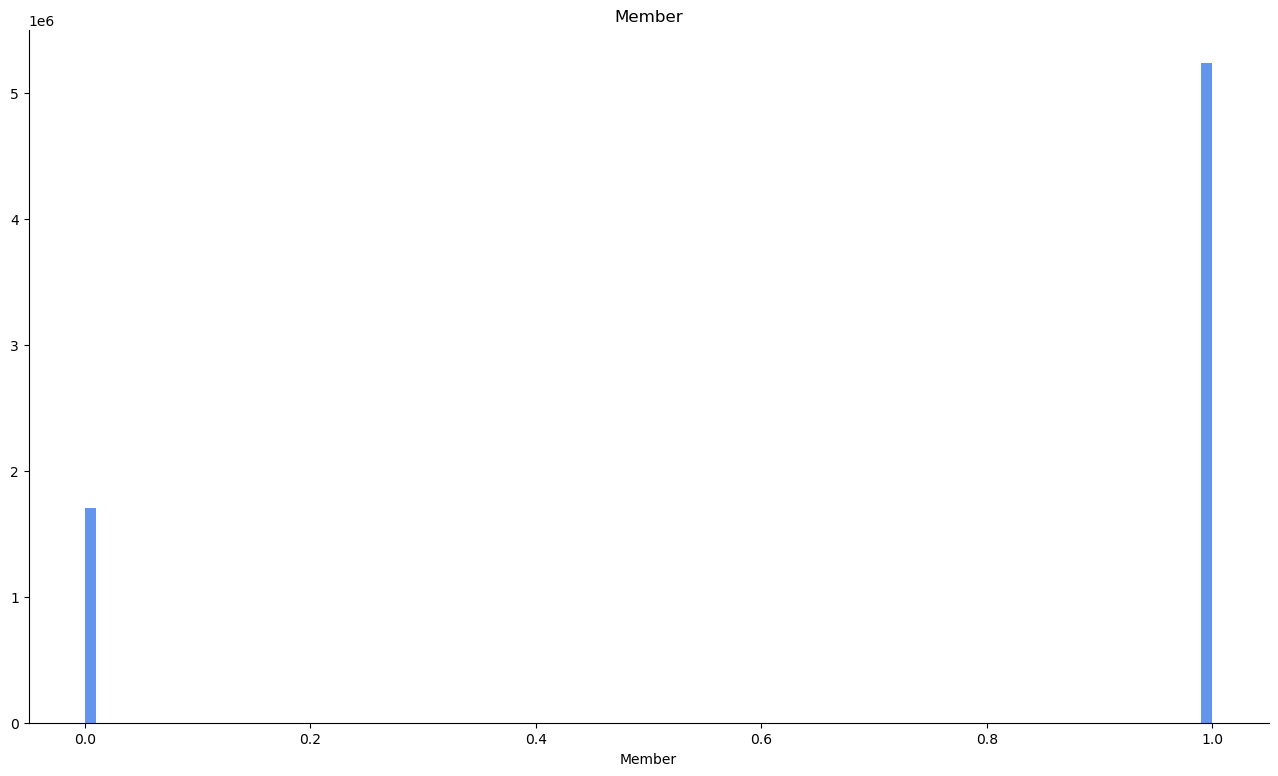


------------------------------------------------------------
Weekend
------------------------------------------------------------
    


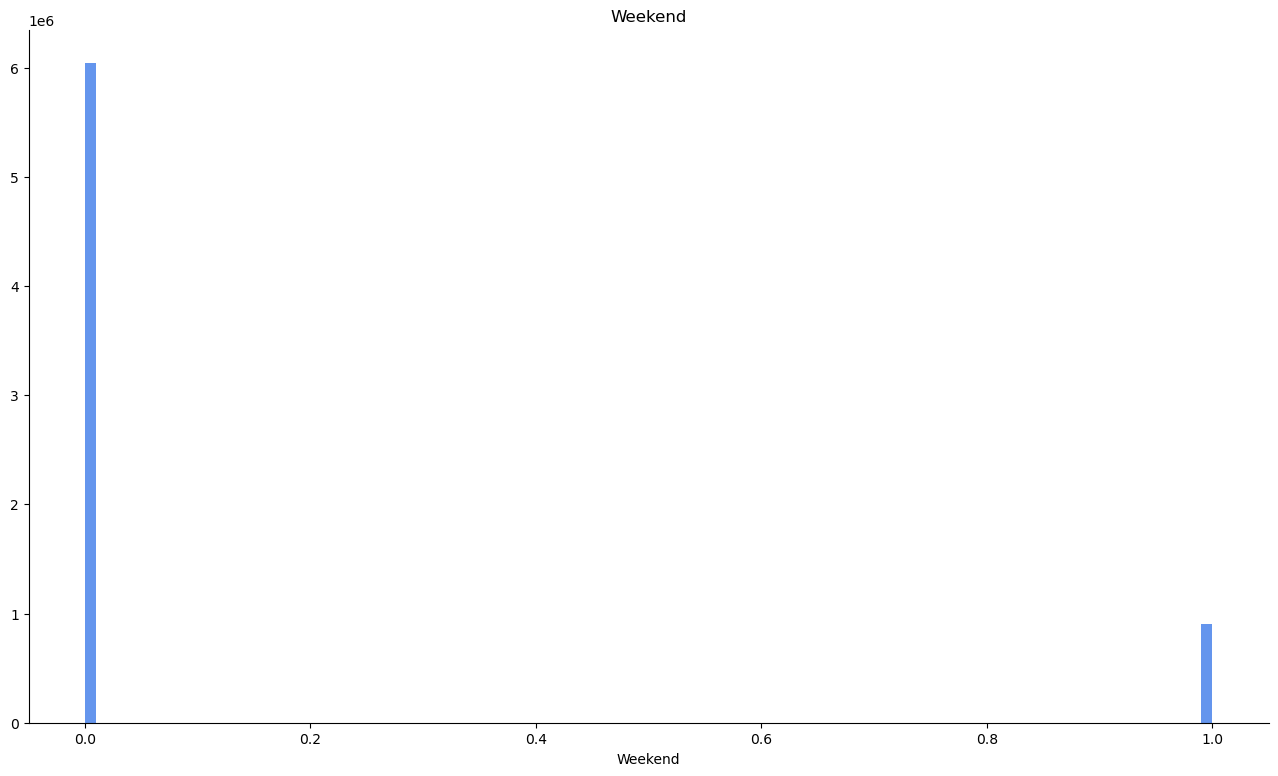


------------------------------------------------------------
Holiday
------------------------------------------------------------
    


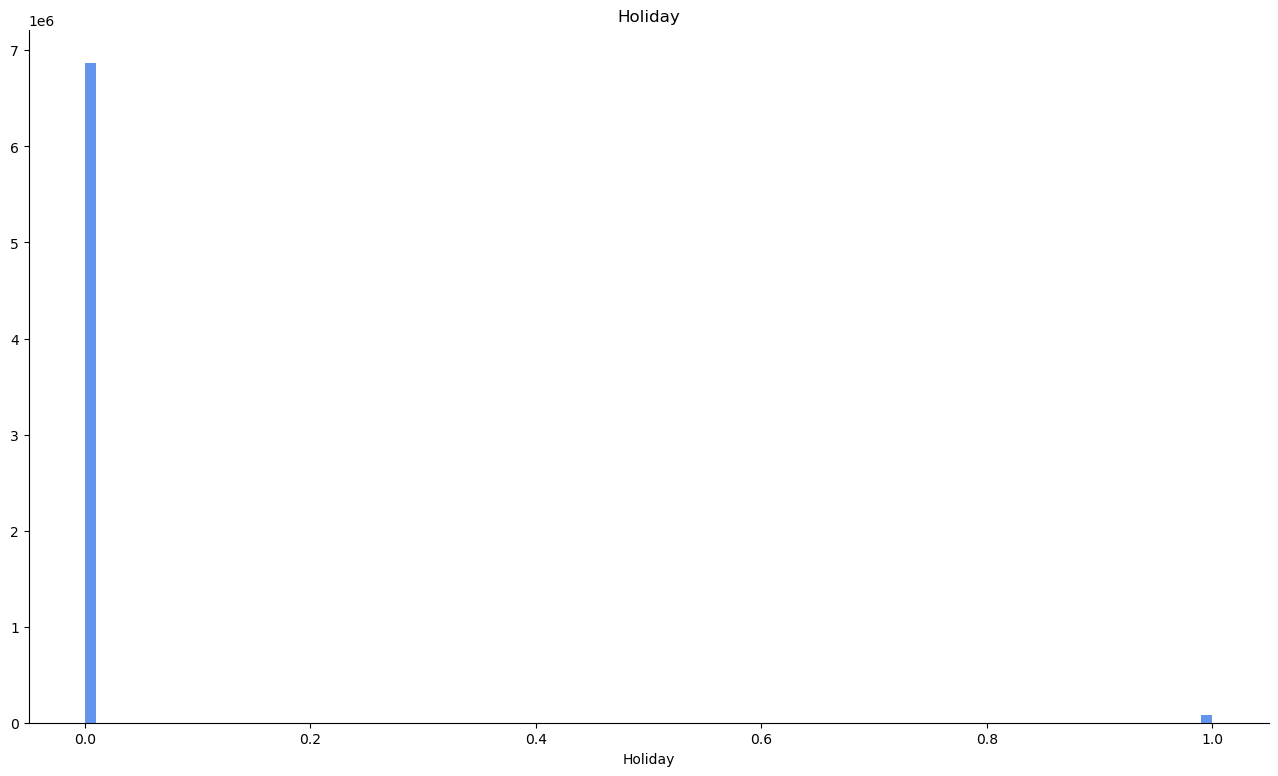


------------------------------------------------------------
Temp (°C)
------------------------------------------------------------
    


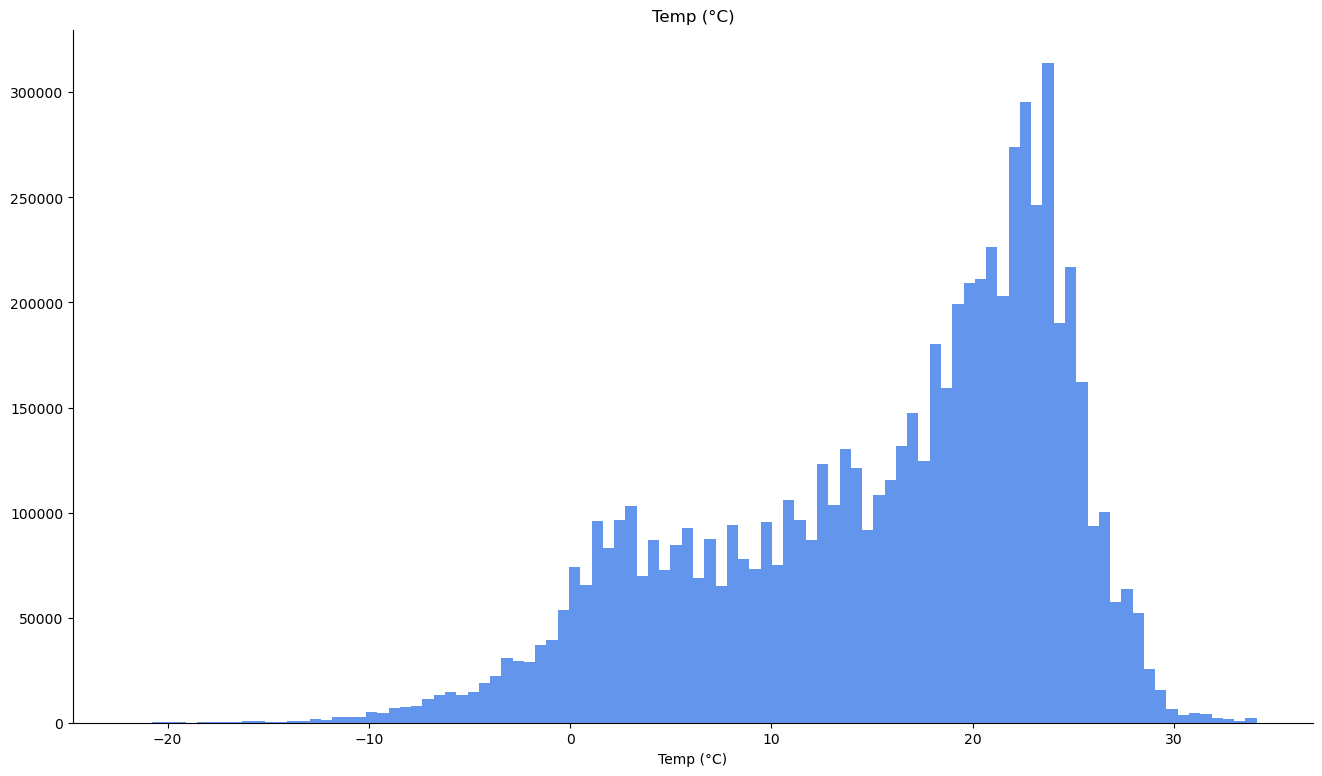


------------------------------------------------------------
Dew Point Temp (°C)
------------------------------------------------------------
    


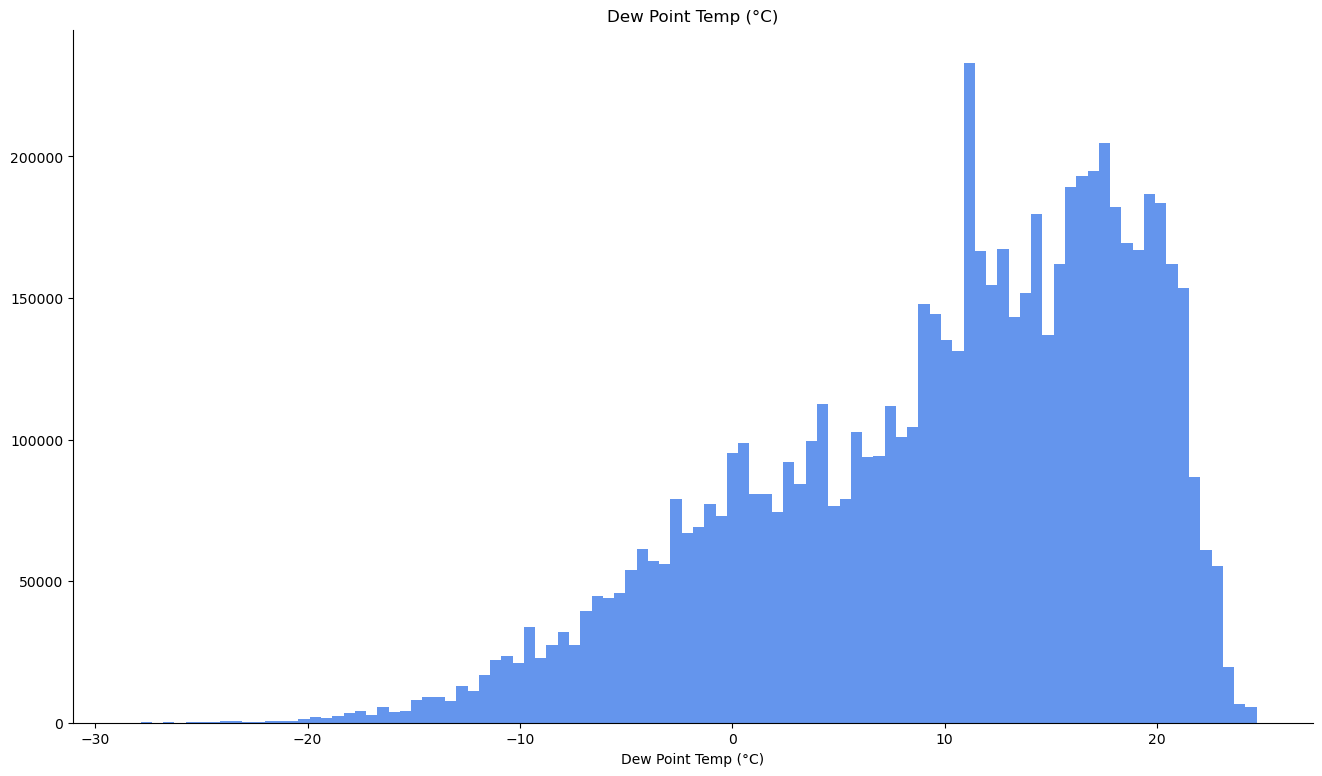


------------------------------------------------------------
Rel Hum (%)
------------------------------------------------------------
    


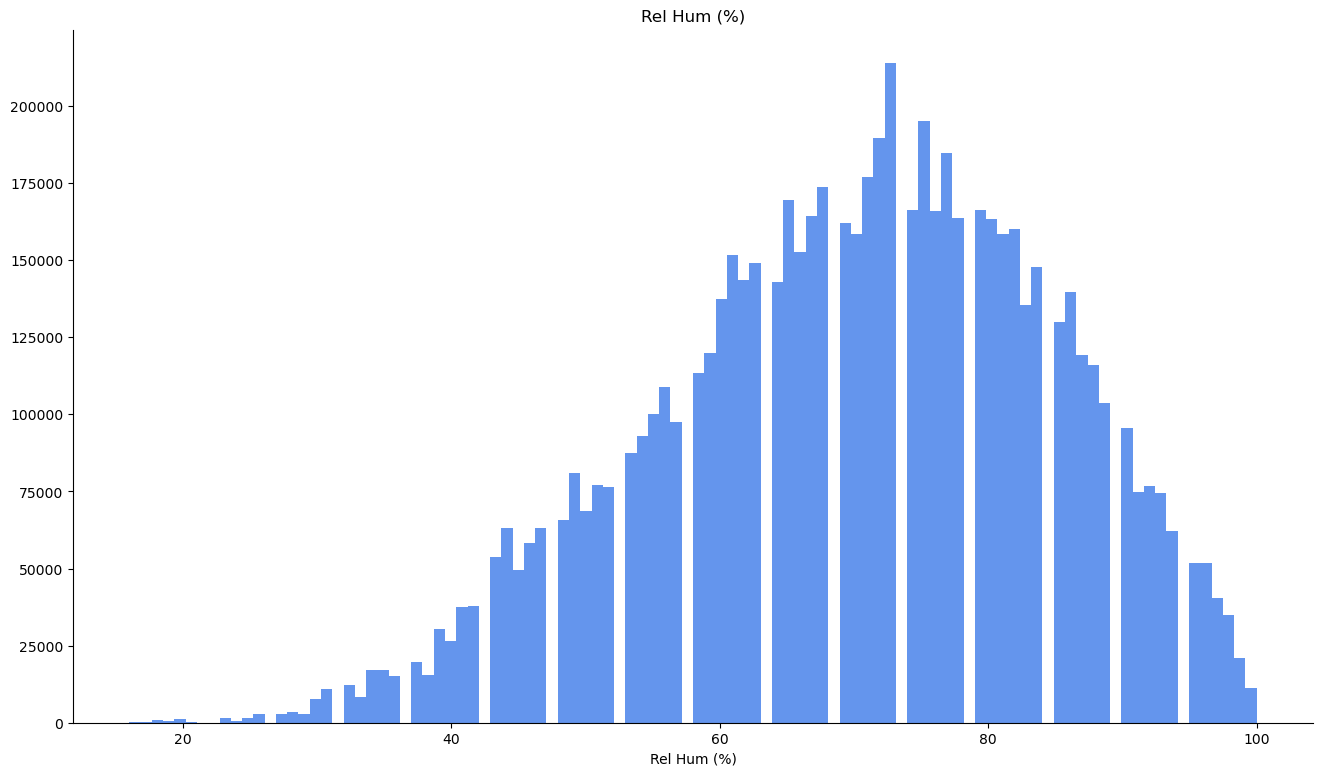


------------------------------------------------------------
Visibility (km)
------------------------------------------------------------
    


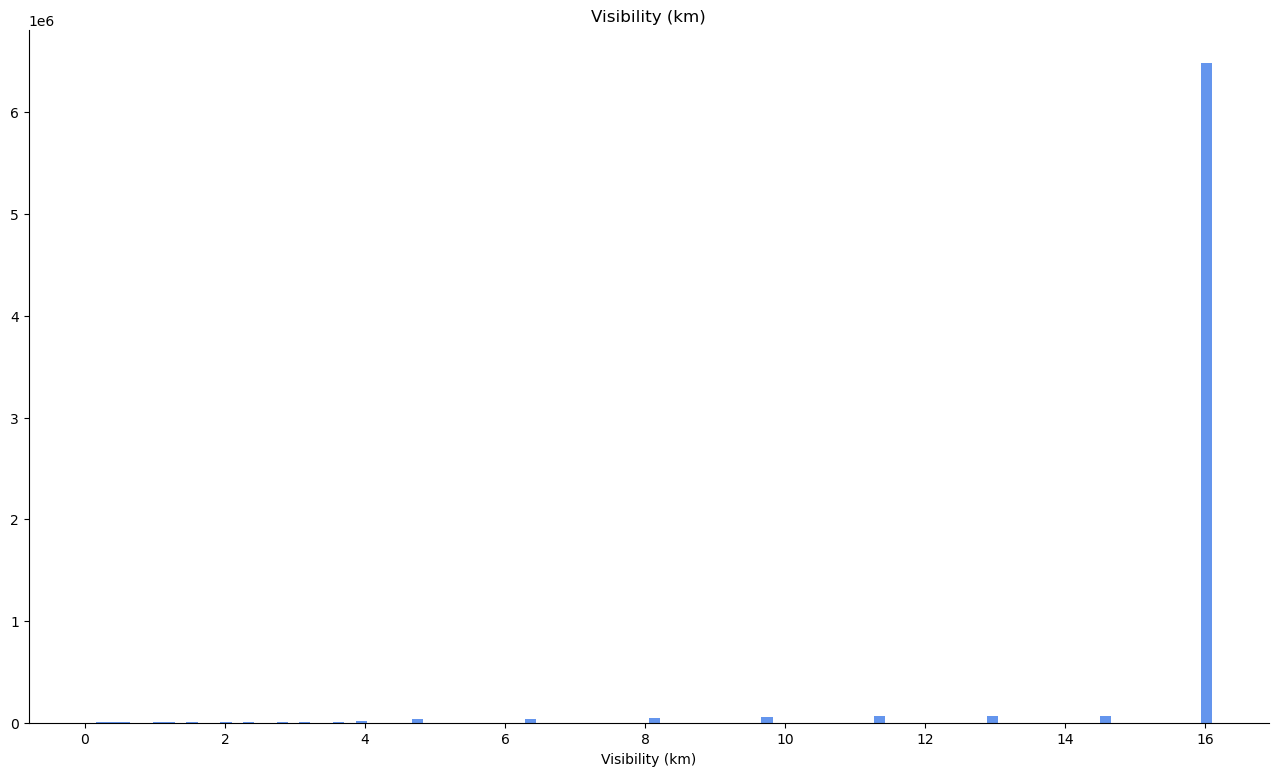


------------------------------------------------------------
Stn Press (kPa)
------------------------------------------------------------
    


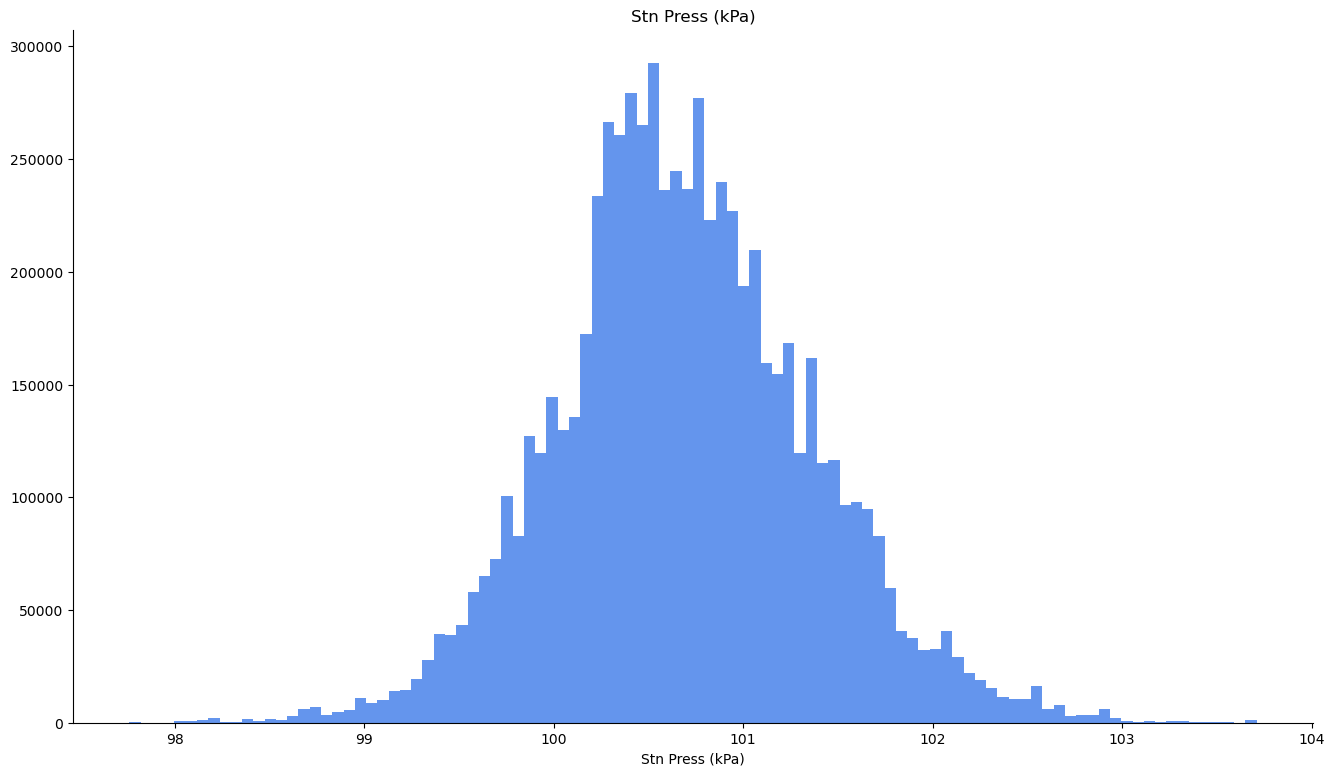


------------------------------------------------------------
Hmdx
------------------------------------------------------------
    


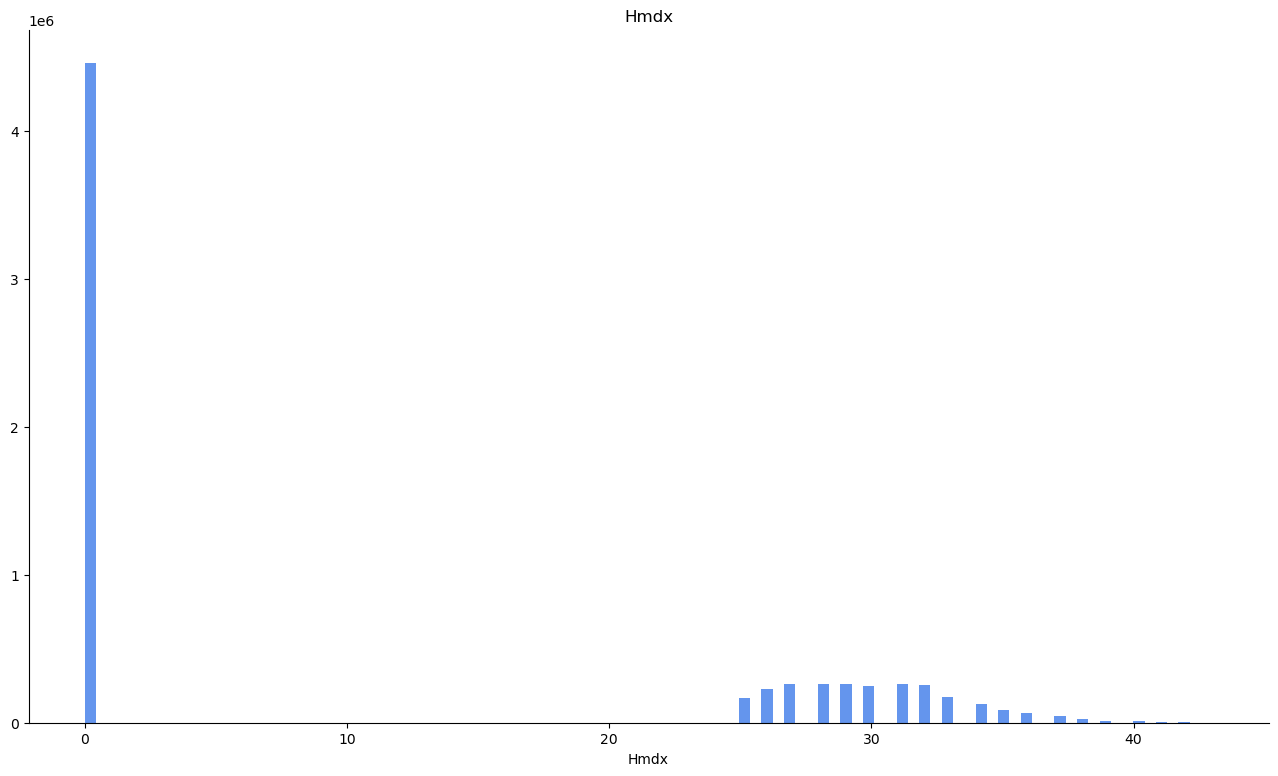


------------------------------------------------------------
Wind Chill
------------------------------------------------------------
    


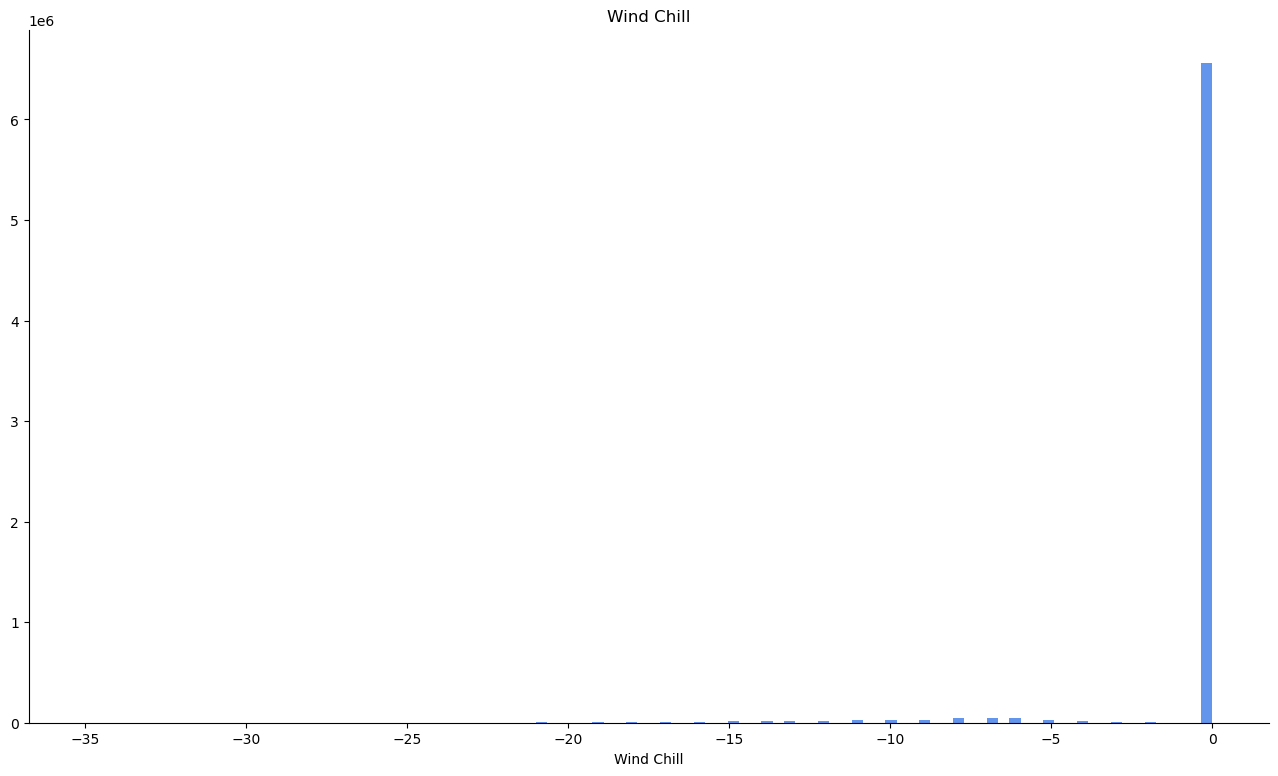


------------------------------------------------------------
Clear
------------------------------------------------------------
    


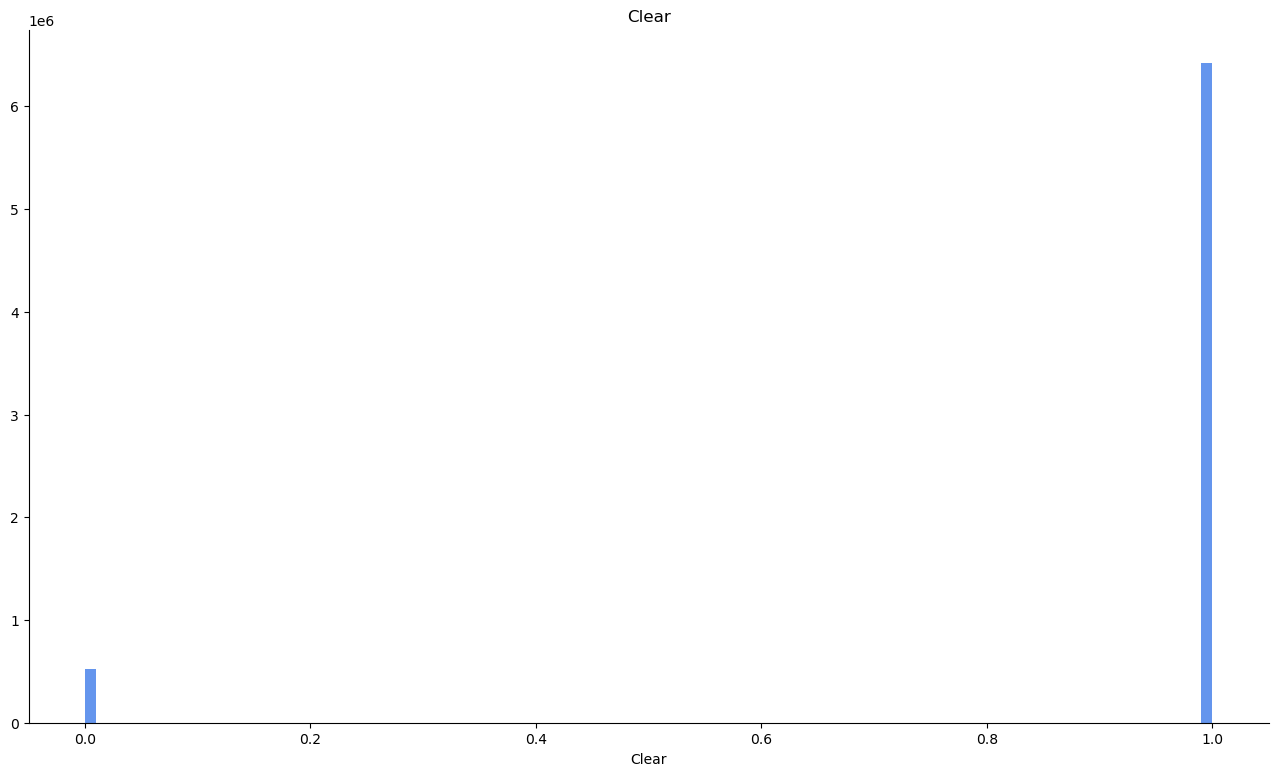


------------------------------------------------------------
Strong Wind
------------------------------------------------------------
    


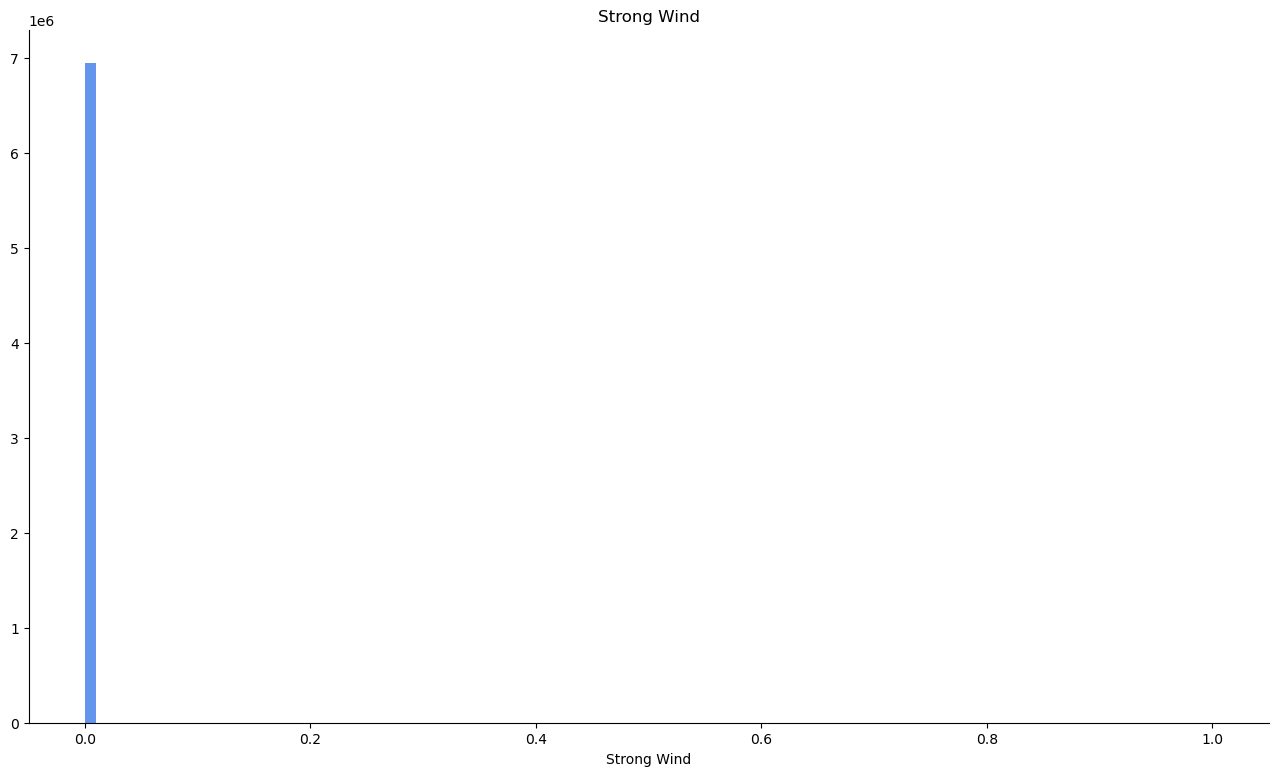


------------------------------------------------------------
Blowing Snow
------------------------------------------------------------
    


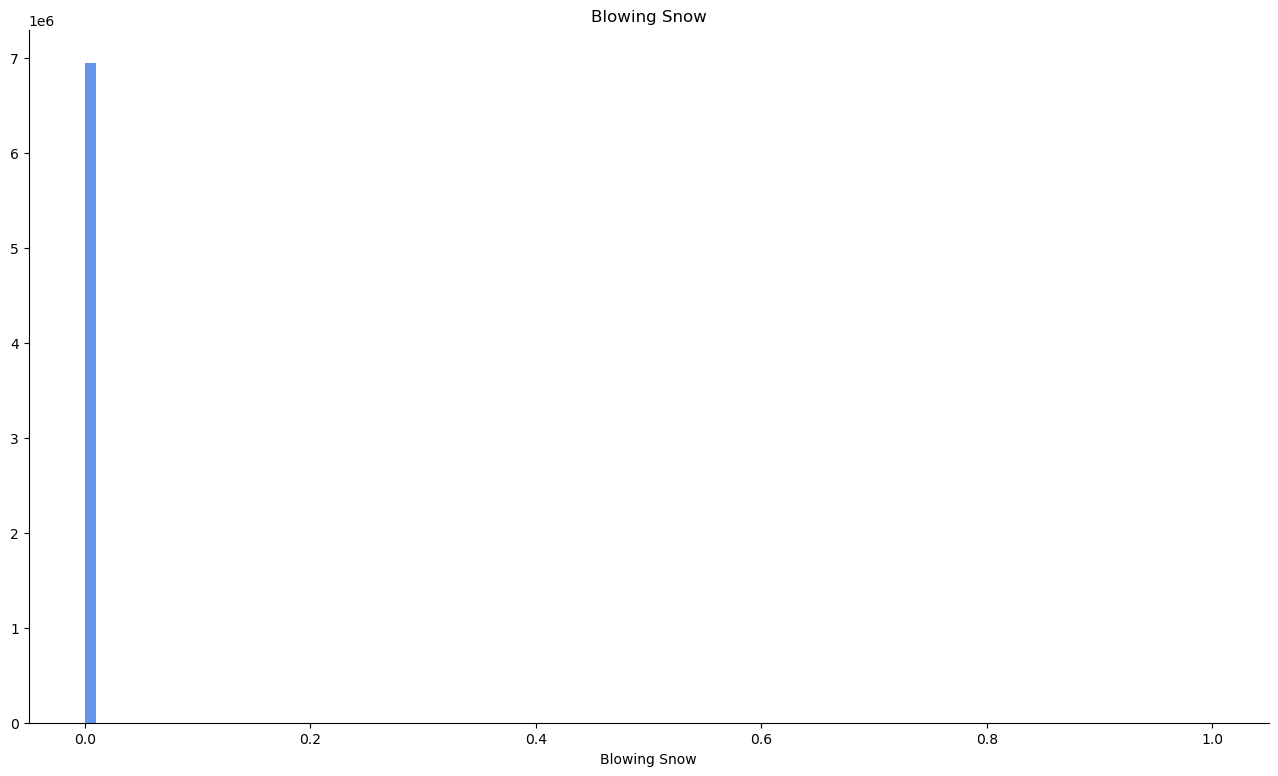


------------------------------------------------------------
Fog
------------------------------------------------------------
    


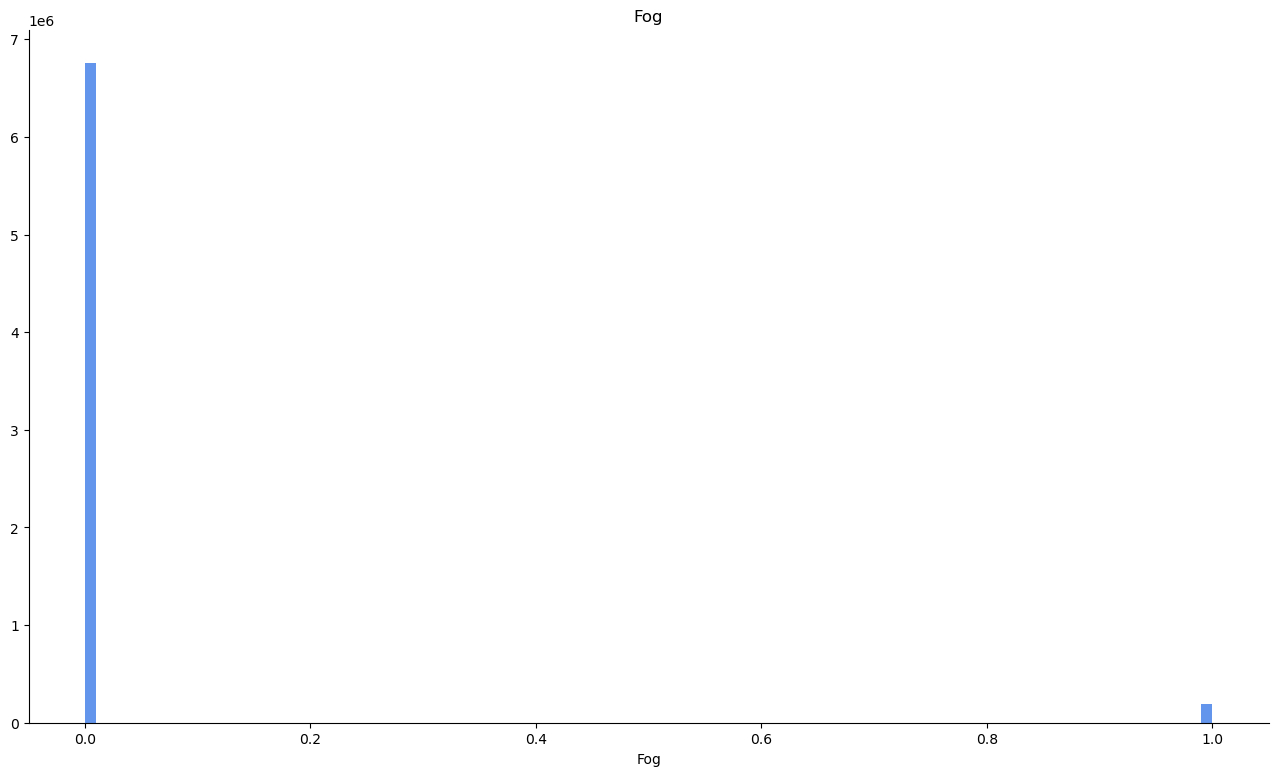


------------------------------------------------------------
Freezing Rain
------------------------------------------------------------
    


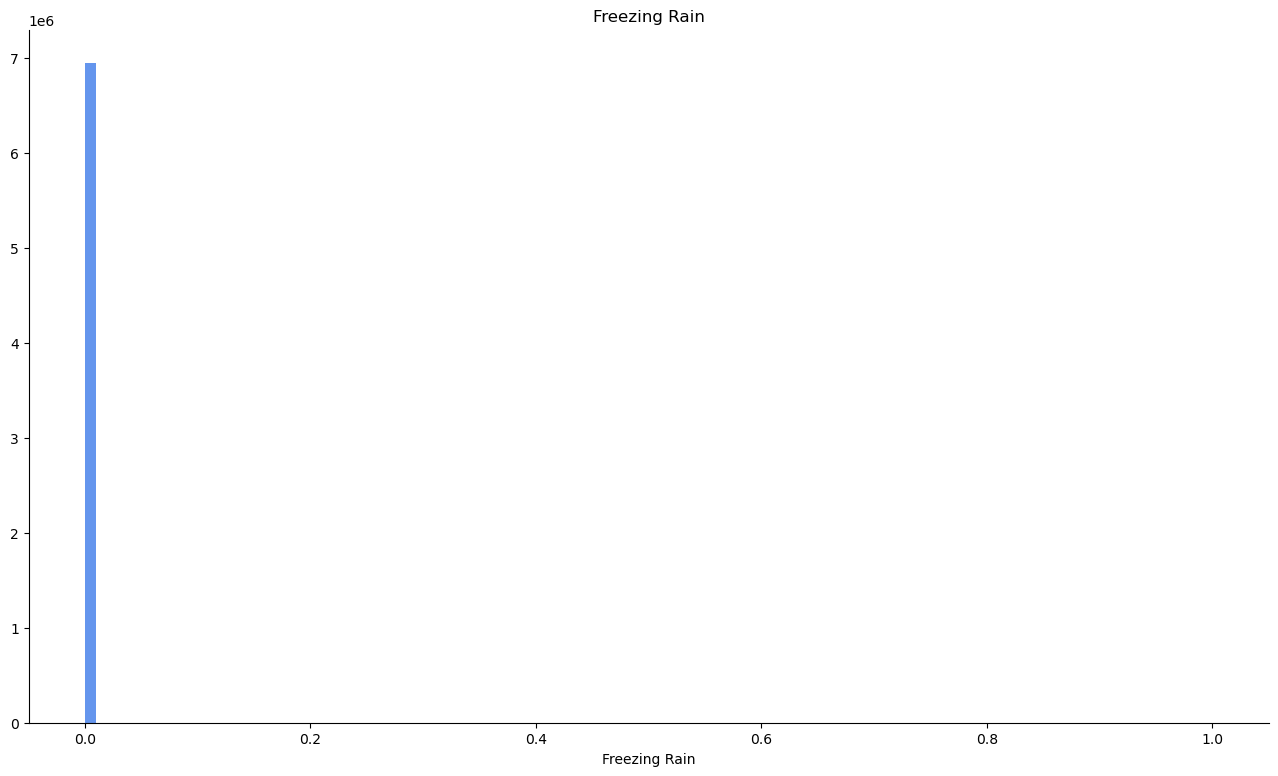


------------------------------------------------------------
Haze
------------------------------------------------------------
    


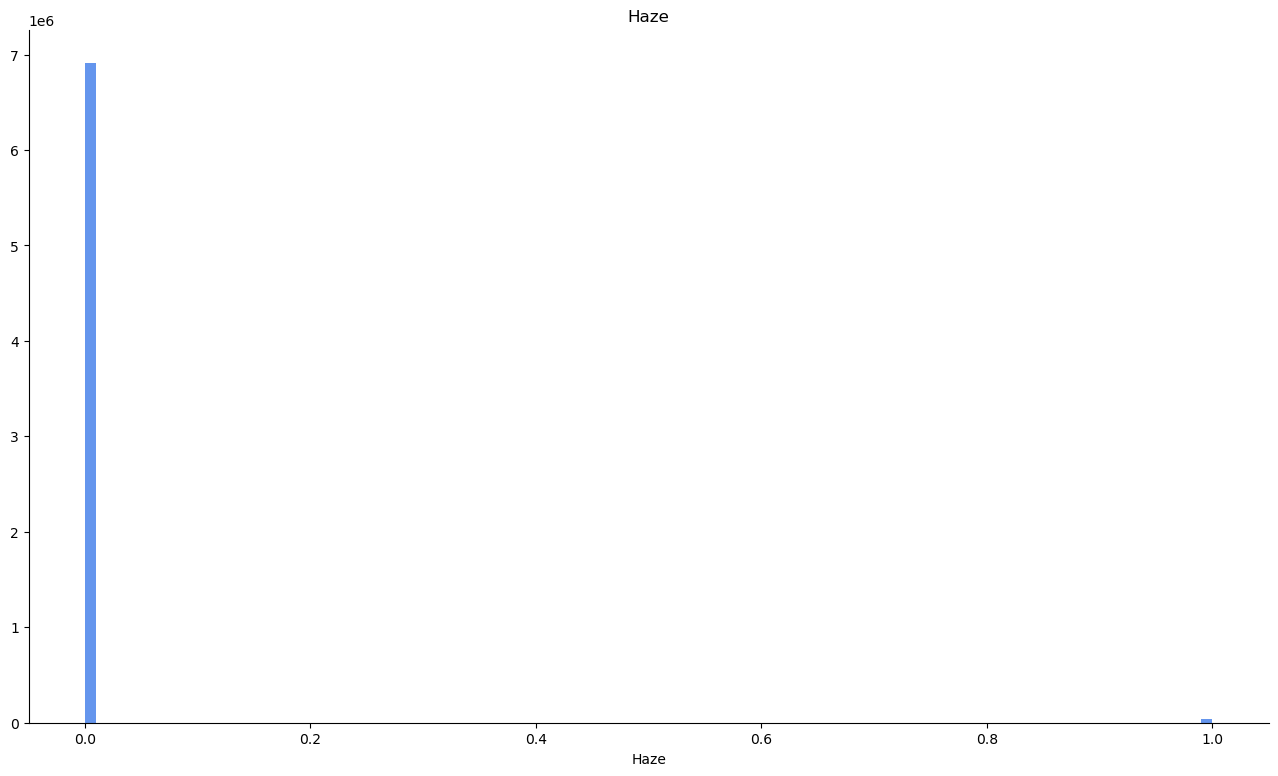


------------------------------------------------------------
Heavy Rain
------------------------------------------------------------
    


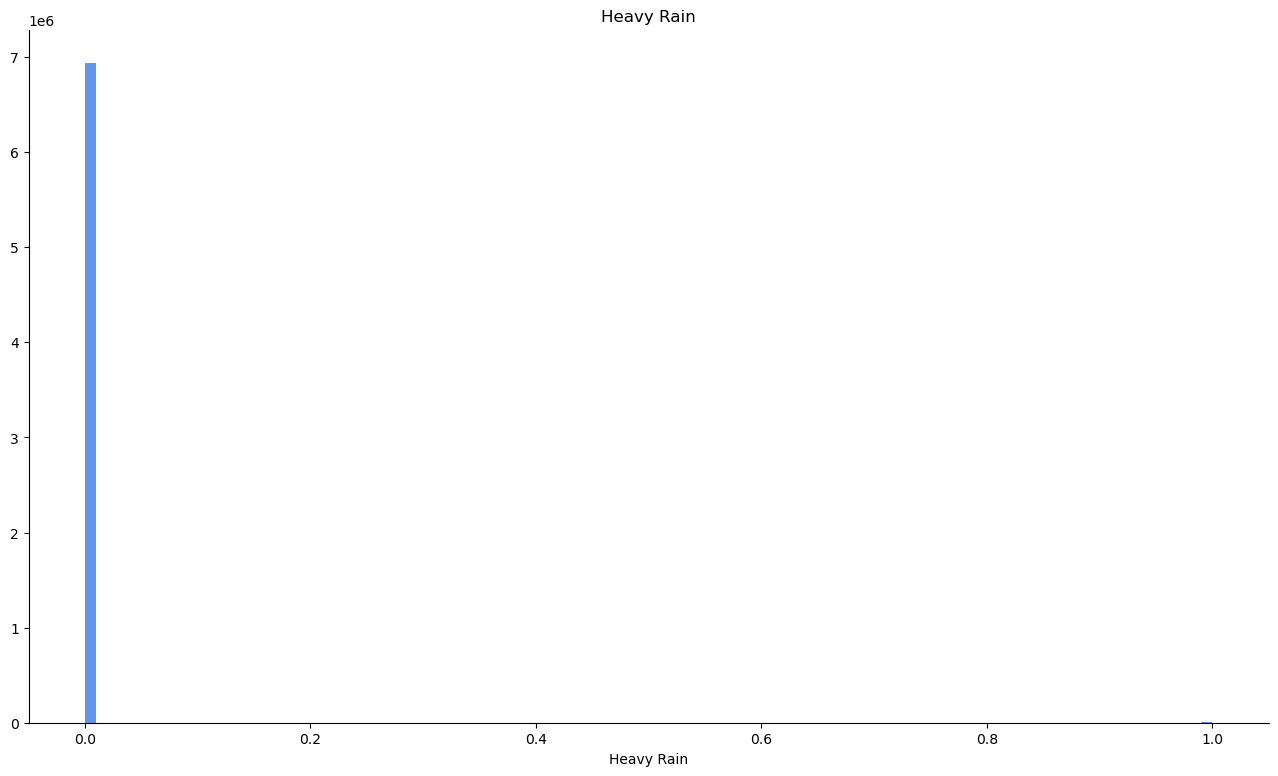


------------------------------------------------------------
Heavy Snow
------------------------------------------------------------
    


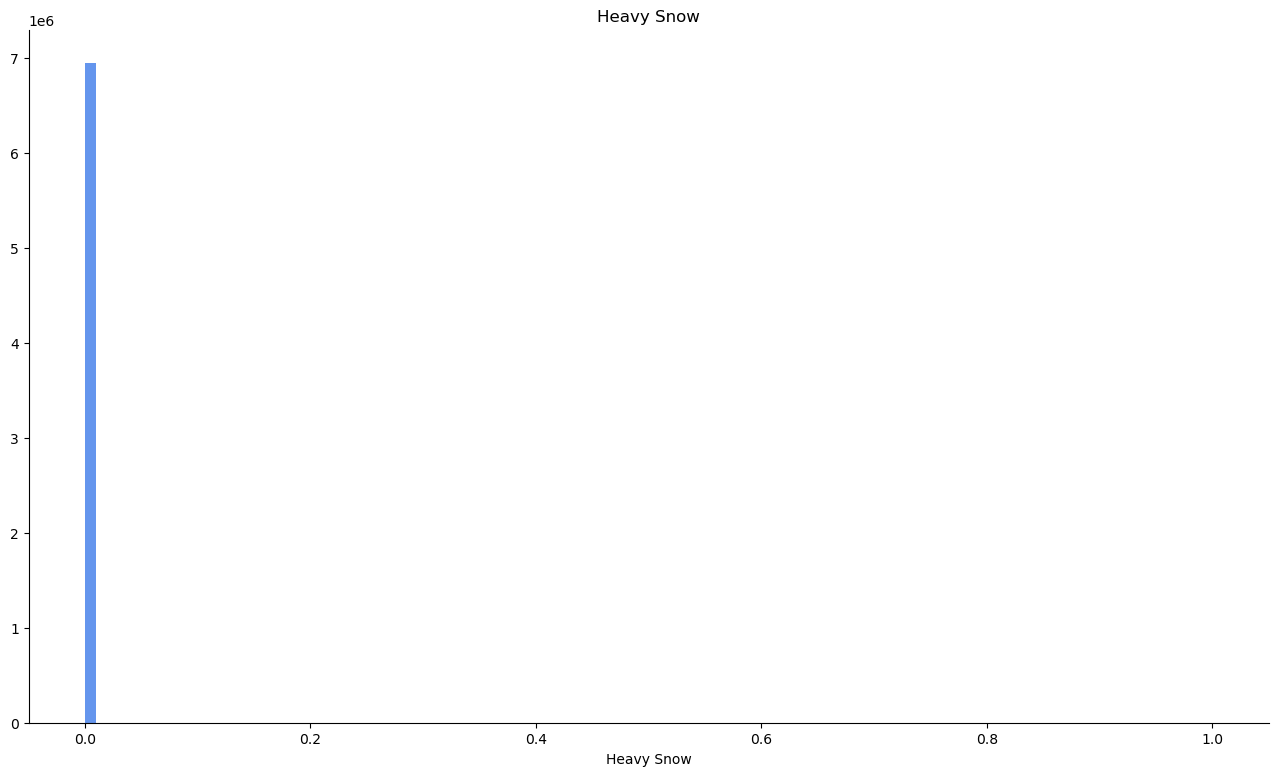


------------------------------------------------------------
Moderate Rain
------------------------------------------------------------
    


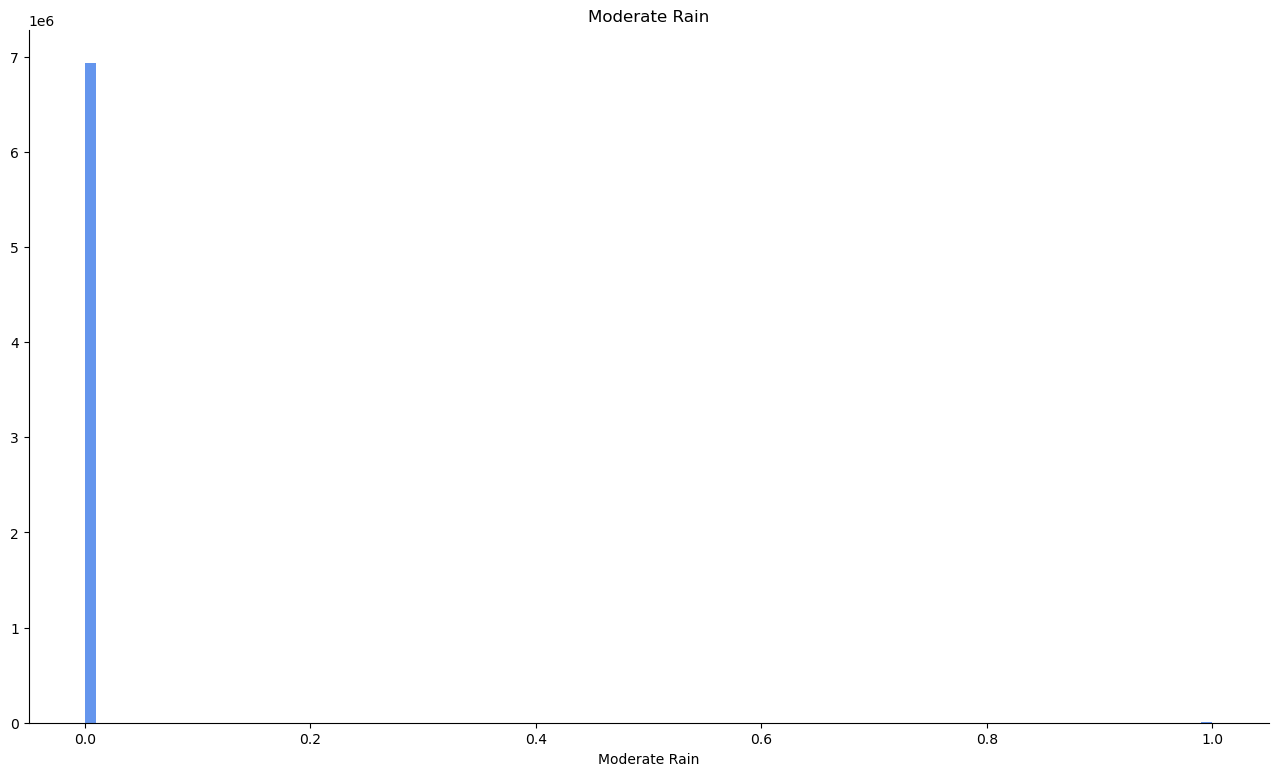


------------------------------------------------------------
Moderate Snow
------------------------------------------------------------
    


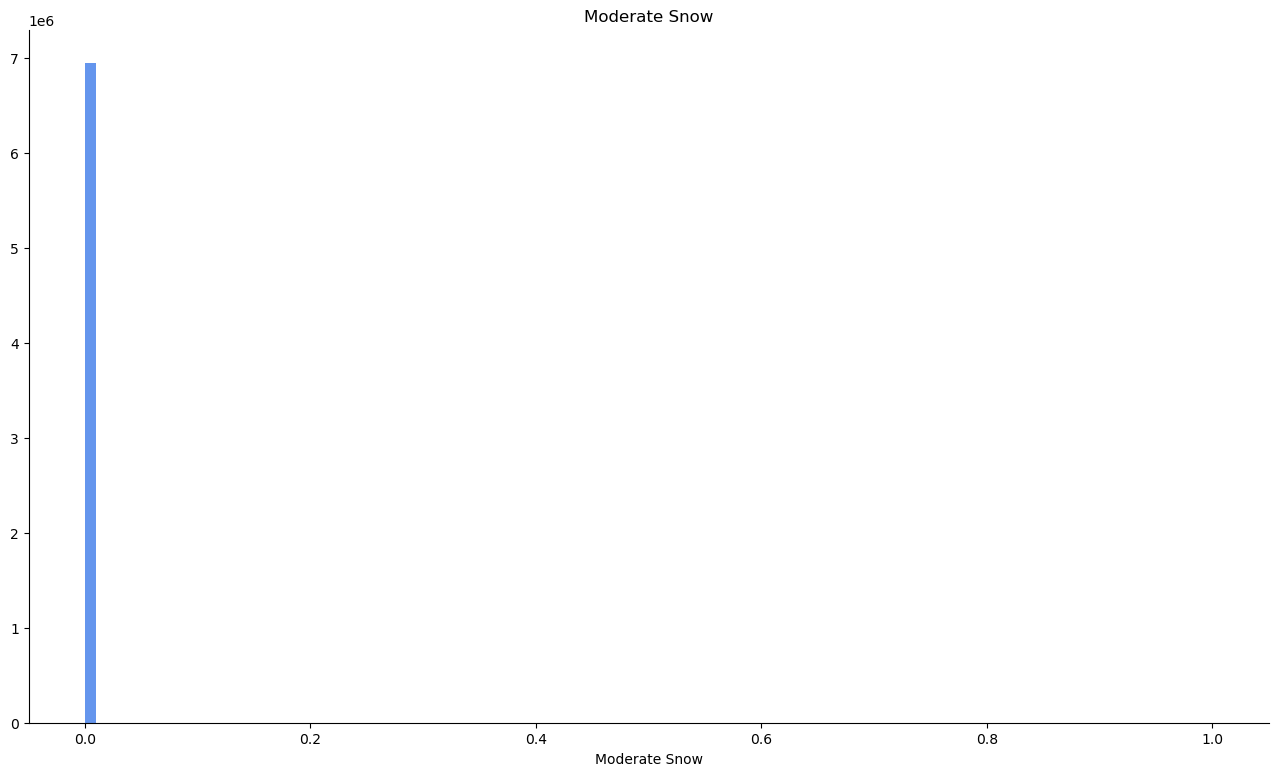


------------------------------------------------------------
Rain
------------------------------------------------------------
    


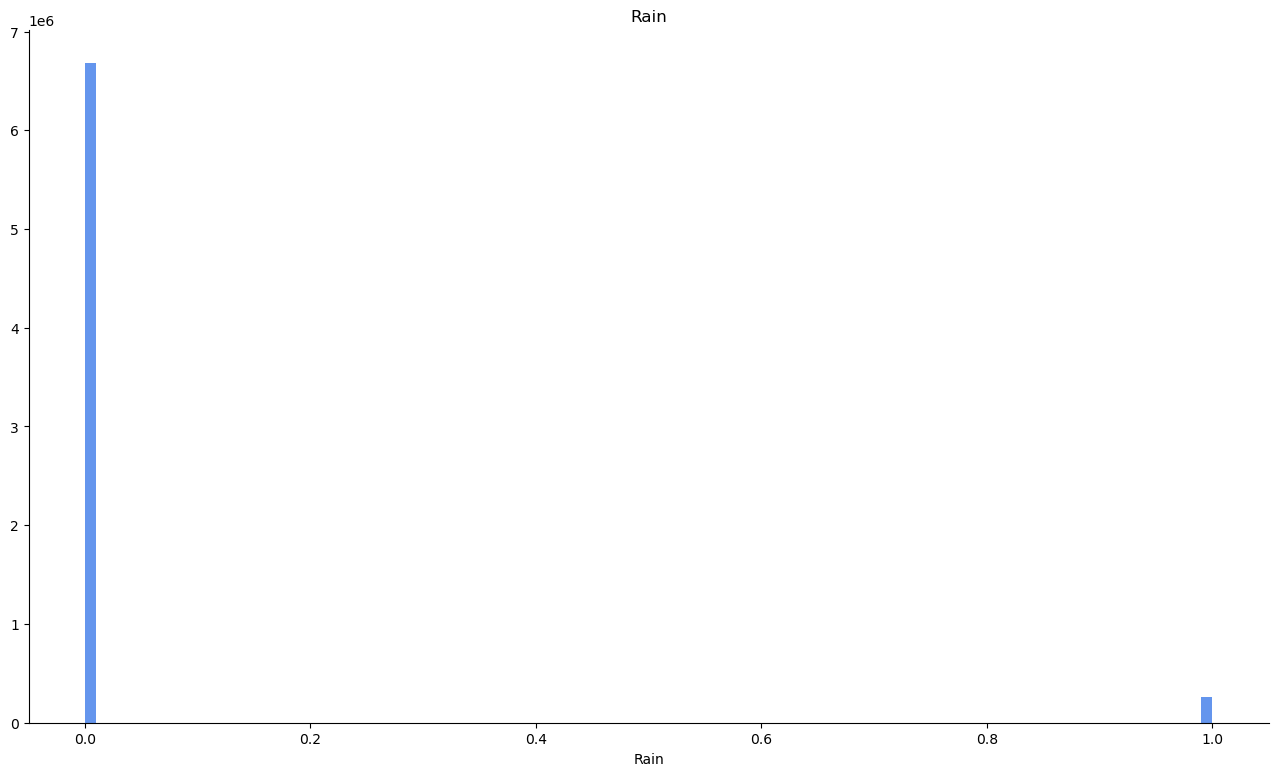


------------------------------------------------------------
Snow
------------------------------------------------------------
    


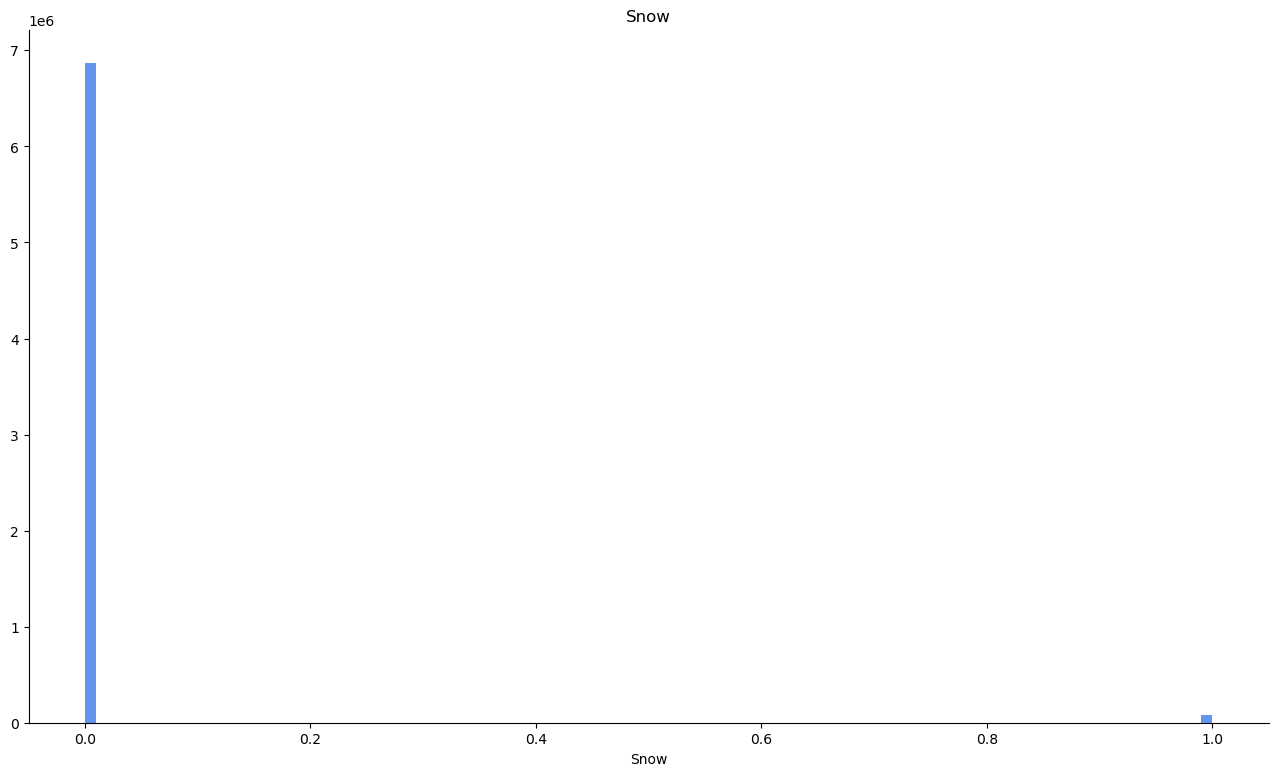


------------------------------------------------------------
Thunderstorms
------------------------------------------------------------
    


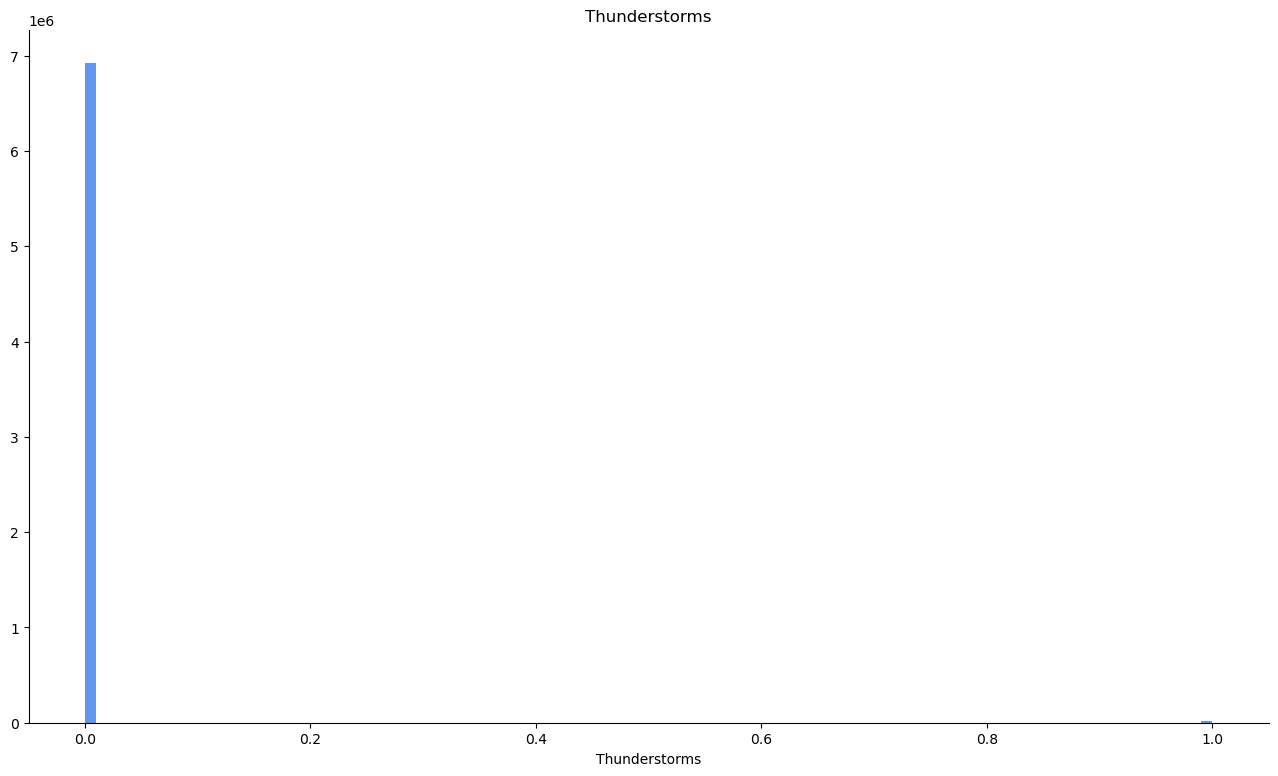


------------------------------------------------------------
Weather_Type
------------------------------------------------------------
    


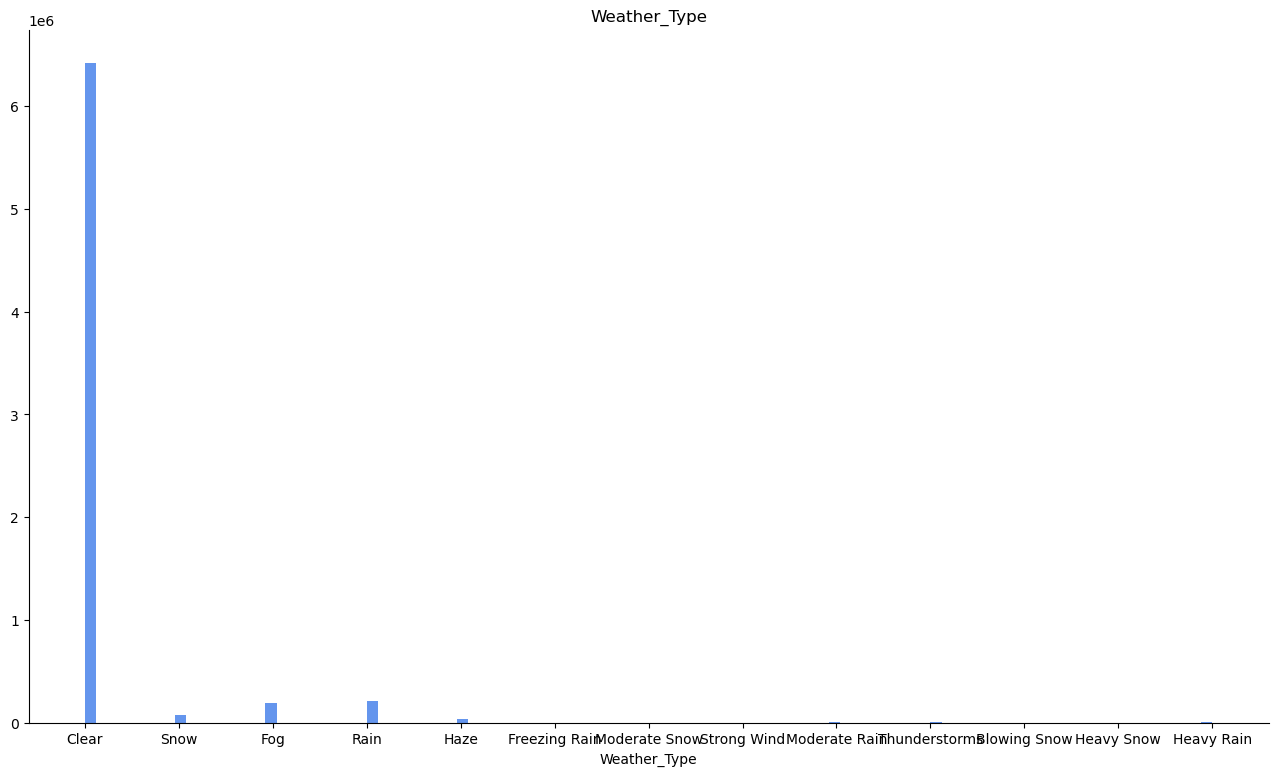

In [183]:
# Ignore runtime warning
import warnings
warnings.filterwarnings('ignore')

# Display histogram for each feature in dataframe
for col in df18_20:
    print(f"""
------------------------------------------------------------
{col}
------------------------------------------------------------
    """)
    plt.figure(figsize=(16, 9))
    plt.title(col)
    plt.hist(df18_20[col], color='cornflowerblue', bins=100)
    plt.xlabel(col)
    sns.despine()
    plt.show()

In [184]:
#%store temperature_data
%store df18_20
%store data_hours

Stored 'df18_20' (DataFrame)
Stored 'data_hours' (DataFrame)


**_Observations_**
- Trips have been on the upward trend over the years with the last few months having the most variation between each day compared to previous years.
- There is a clear seasonality displayed in the Start Time and End Time columns based on bike usage trend with summer highs and winter lows and steady upward trend over the years.

---
## Section 4: Conclusions

#### Summary 
To reinterate the observations and trends from before:
- Trips have shown a consistent upward trend over the years, with 2020 exhibiting the most significant weekly variation compared to previous years.

- There is a noticeable seasonality each year, with the peak of rides occurring in the heart of summer and the fewest rides in the winter months.

- The station usage pattern has remained relatively consistent over the previous three years, where the top five start and stop stations were a mix of downtown and harbourfront locations. However, in 2020, all the top start and stop stations are situated along the harbourfront.

- The most common temperature at the start of a trip falls within the range of 18-25°C, suggesting that this temperature range is preferred by bike users for their trips.

- Most trips occur outside of weather events, with rain being the most common weather condition if a ride happens during a weather event.
